# 執行之前需先上傳 train.csv、test.csv、kaiu.ttf

In [1]:
! pip3 install h2o

     |████████████████████████████████| 176.2 MB 1.8 kB/s 
  Created wheel for h2o: filename=h2o-3.36.0.4-py2.py3-none-any.whl size=176245474 sha256=fd29fbc810427ffd08b5adcaa3ffb6e44f630d928ab12858c46cbcbb4c1d50a1
  Stored in directory: /root/.cache/pip/wheels/66/7c/3b/6558f625a9415a96f7f650d33f1def07b6e30b0c871e8407a1
Successfully built h2o


In [2]:
import h2o
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.ensemble import RandomForestRegressor

h2o.init(nthreads=-1)
%matplotlib inline
pd.set_option('display.max_columns', None)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.14.1" 2022-02-08; OpenJDK Runtime Environment (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.14.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5vu3h4yg
  JVM stdout: /tmp/tmp5vu3h4yg/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5vu3h4yg/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.0.4
H2O_cluster_version_age:    13 days
H2O_cluster_name:           H2O_from_python_unknownUser_mvcfgx
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

# Add font
[method1 reference](https://colab.research.google.com/github/nicewook/datascience_exercise/blob/master/korean_font_on_matplotlib_essential.ipynb#scrollTo=SRz4GNtAaGvr)

In [3]:
# # # method1 ---> do not work.
# # # ! rm -fr ~/.cache/matplotlib
# # # sys_font = matplotlib.font_manager.findSystemFonts()
# # # font_list = [f for f in sys_font]
# # # print(f'font number: {len(font_list)}')
# # # print('\n'.join(font_list))
# # # # refresh font list, so that Matplotlib font manager knows them.
# # # matplotlib.font_manager._rebuild()
# # # install font
# # ! mv /content/DFKai-SB.ttf /usr/share/fonts/truetype/liberation/
# # # display installed font list
# # sys_font = matplotlib.font_manager.findSystemFonts()
# # font_list = [f for f in sys_font]
# # print(f'font number: {len(font_list)}')
# # print('\n'.join(font_list))
# # # refresh font list, so that Matplotlib font manager knows them.
# # matplotlib.font_manager._rebuild()
# # # set font
# # path = '/usr/share/fonts/truetype/liberation/DFKai-SB.ttf' 
# # font_name = matplotlib.font_manager.FontProperties(fname=path).get_name()
# # plt.rc('font', family=font_name)
# # # minus character issue fix
# # plt.rcParams['axes.unicode_minus'] = False

# # # method2 ---> work!
# ! wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
# # 新增字體
# matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# # 將 font-family 設為 Taipei Sans TC Beta
# # 設定完後，之後的圖表都可以顯示中文了
# matplotlib.rc('font', family='Taipei Sans TC Beta')

# # # method3 ---> work!
# step1: 上傳 kaiu.ttf
# step2: 新增字體
matplotlib.font_manager.fontManager.addfont('kaiu.ttf')
# step3: 將 font-family 設為ttf的family name(FontForge軟體可查看)，
matplotlib.rc('font', family='DFKai-SB')

In [4]:
df = pd.read_csv('/content/train.csv')
df
# df.info()
# df.describe()

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [5]:
df.insert(1, 'date', df.datetime.apply(lambda x: x.split()[0]))
df.insert(2, 'year', df.datetime.apply(lambda x: x.split()[0].split('-')[0]).astype('int'))
df.insert(3, 'month', df.datetime.apply(lambda x: x.split()[0].split('-')[1]).astype('int'))
df.insert(4, 'day', df.datetime.apply(lambda x: x.split()[0].split('-')[2]).astype('int'))
df.insert(5, 'weekday', df.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday()))
df.insert(6, 'hour', df.datetime.apply(lambda x: x.split()[1].split(':')[0]).astype('int'))
df

datetime        date  year  month  day  weekday  hour  \
0      2011-01-01 00:00:00  2011-01-01  2011      1    1        5     0   
1      2011-01-01 01:00:00  2011-01-01  2011      1    1        5     1   
2      2011-01-01 02:00:00  2011-01-01  2011      1    1        5     2   
3      2011-01-01 03:00:00  2011-01-01  2011      1    1        5     3   
4      2011-01-01 04:00:00  2011-01-01  2011      1    1        5     4   
...                    ...         ...   ...    ...  ...      ...   ...   
10881  2012-12-19 19:00:00  2012-12-19  2012     12   19        2    19   
10882  2012-12-19 20:00:00  2012-12-19  2012     12   19        2    20   
10883  2012-12-19 21:00:00  2012-12-19  2012     12   19        2    21   
10884  2012-12-19 22:00:00  2012-12-19  2012     12   19        2    22   
10885  2012-12-19 23:00:00  2012-12-19  2012     12   19        2    23   

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  casual  registered  count  
0         0.0000       3          13     16  
1         0.0000       8          32     40  
2         0.0000       5          27     32  
3         0.0000       3          10     13  
4         0.0000       0           1      1  
...          ...     ...         ...    ...  
10881    26.0027       7         329    336  
10882    15.0013      10         231    241  
10883    15.0013       4         164    168  
10884     6.0032      12         117    129  
10885     8.9981       4          84     88  

[10886 rows x 18 columns]

In [ ]:
# # An example code to change the idx of pd.DataFrame
# df_idx_datetime = df.set_index('datetime')
# df_idx_datetime
# print(df['2011-01-01 00:00:00': '2011-01-01 23:00:00'])
# df = df.reset_index()
# print(df)

In [6]:
print(set(df.year))
print(set(df.month))
print(set(df.day))  # 訓練資料集，日期僅收錄1日~19日。

{2011, 2012}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}


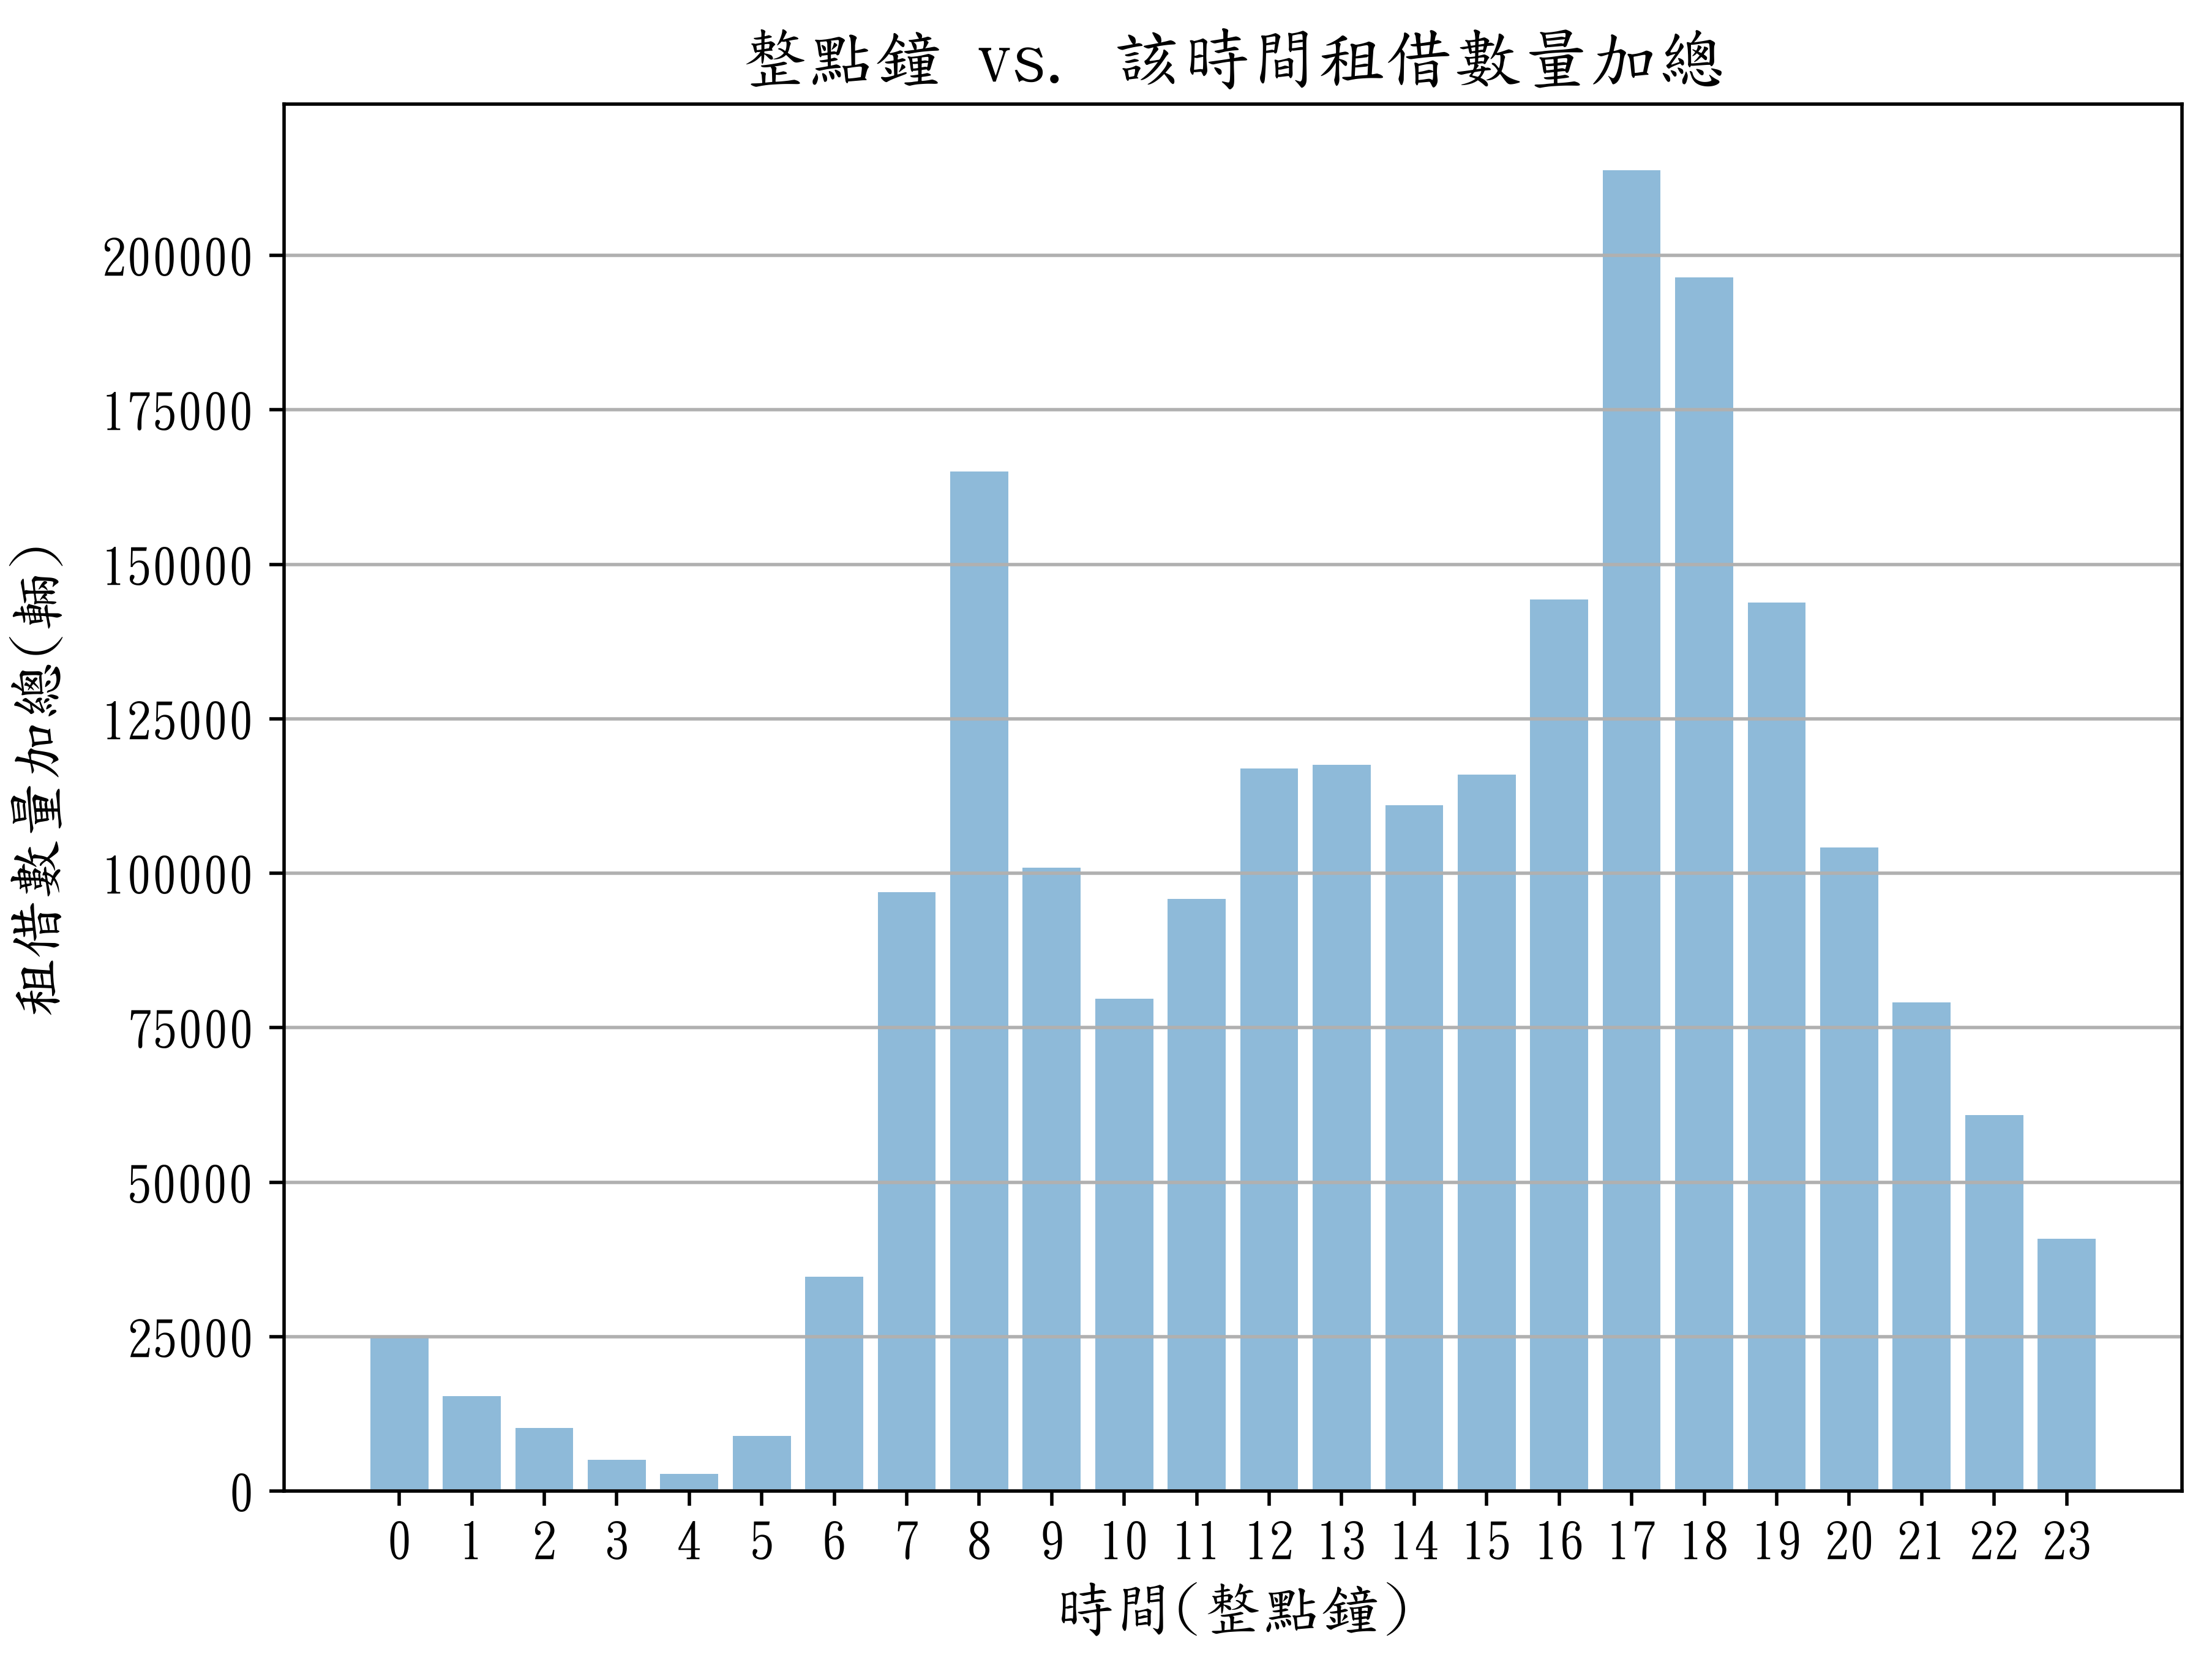

In [7]:
# 探索式資料分析(時間1_整點鐘vs.數量)
data = [df[df['hour'] == i]['count'].sum() for i in range(24)]
objects = [i for i in range(len(data))]
y_pos = range(len(objects))

plt.figure(figsize=(8, 6), dpi=500)
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('時間(整點鐘)', fontsize=14)
plt.ylabel('租借數量加總(輛)', fontsize=14)
plt.title('整點鐘 vs. 該時間租借數量加總', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y')
# plt.show()

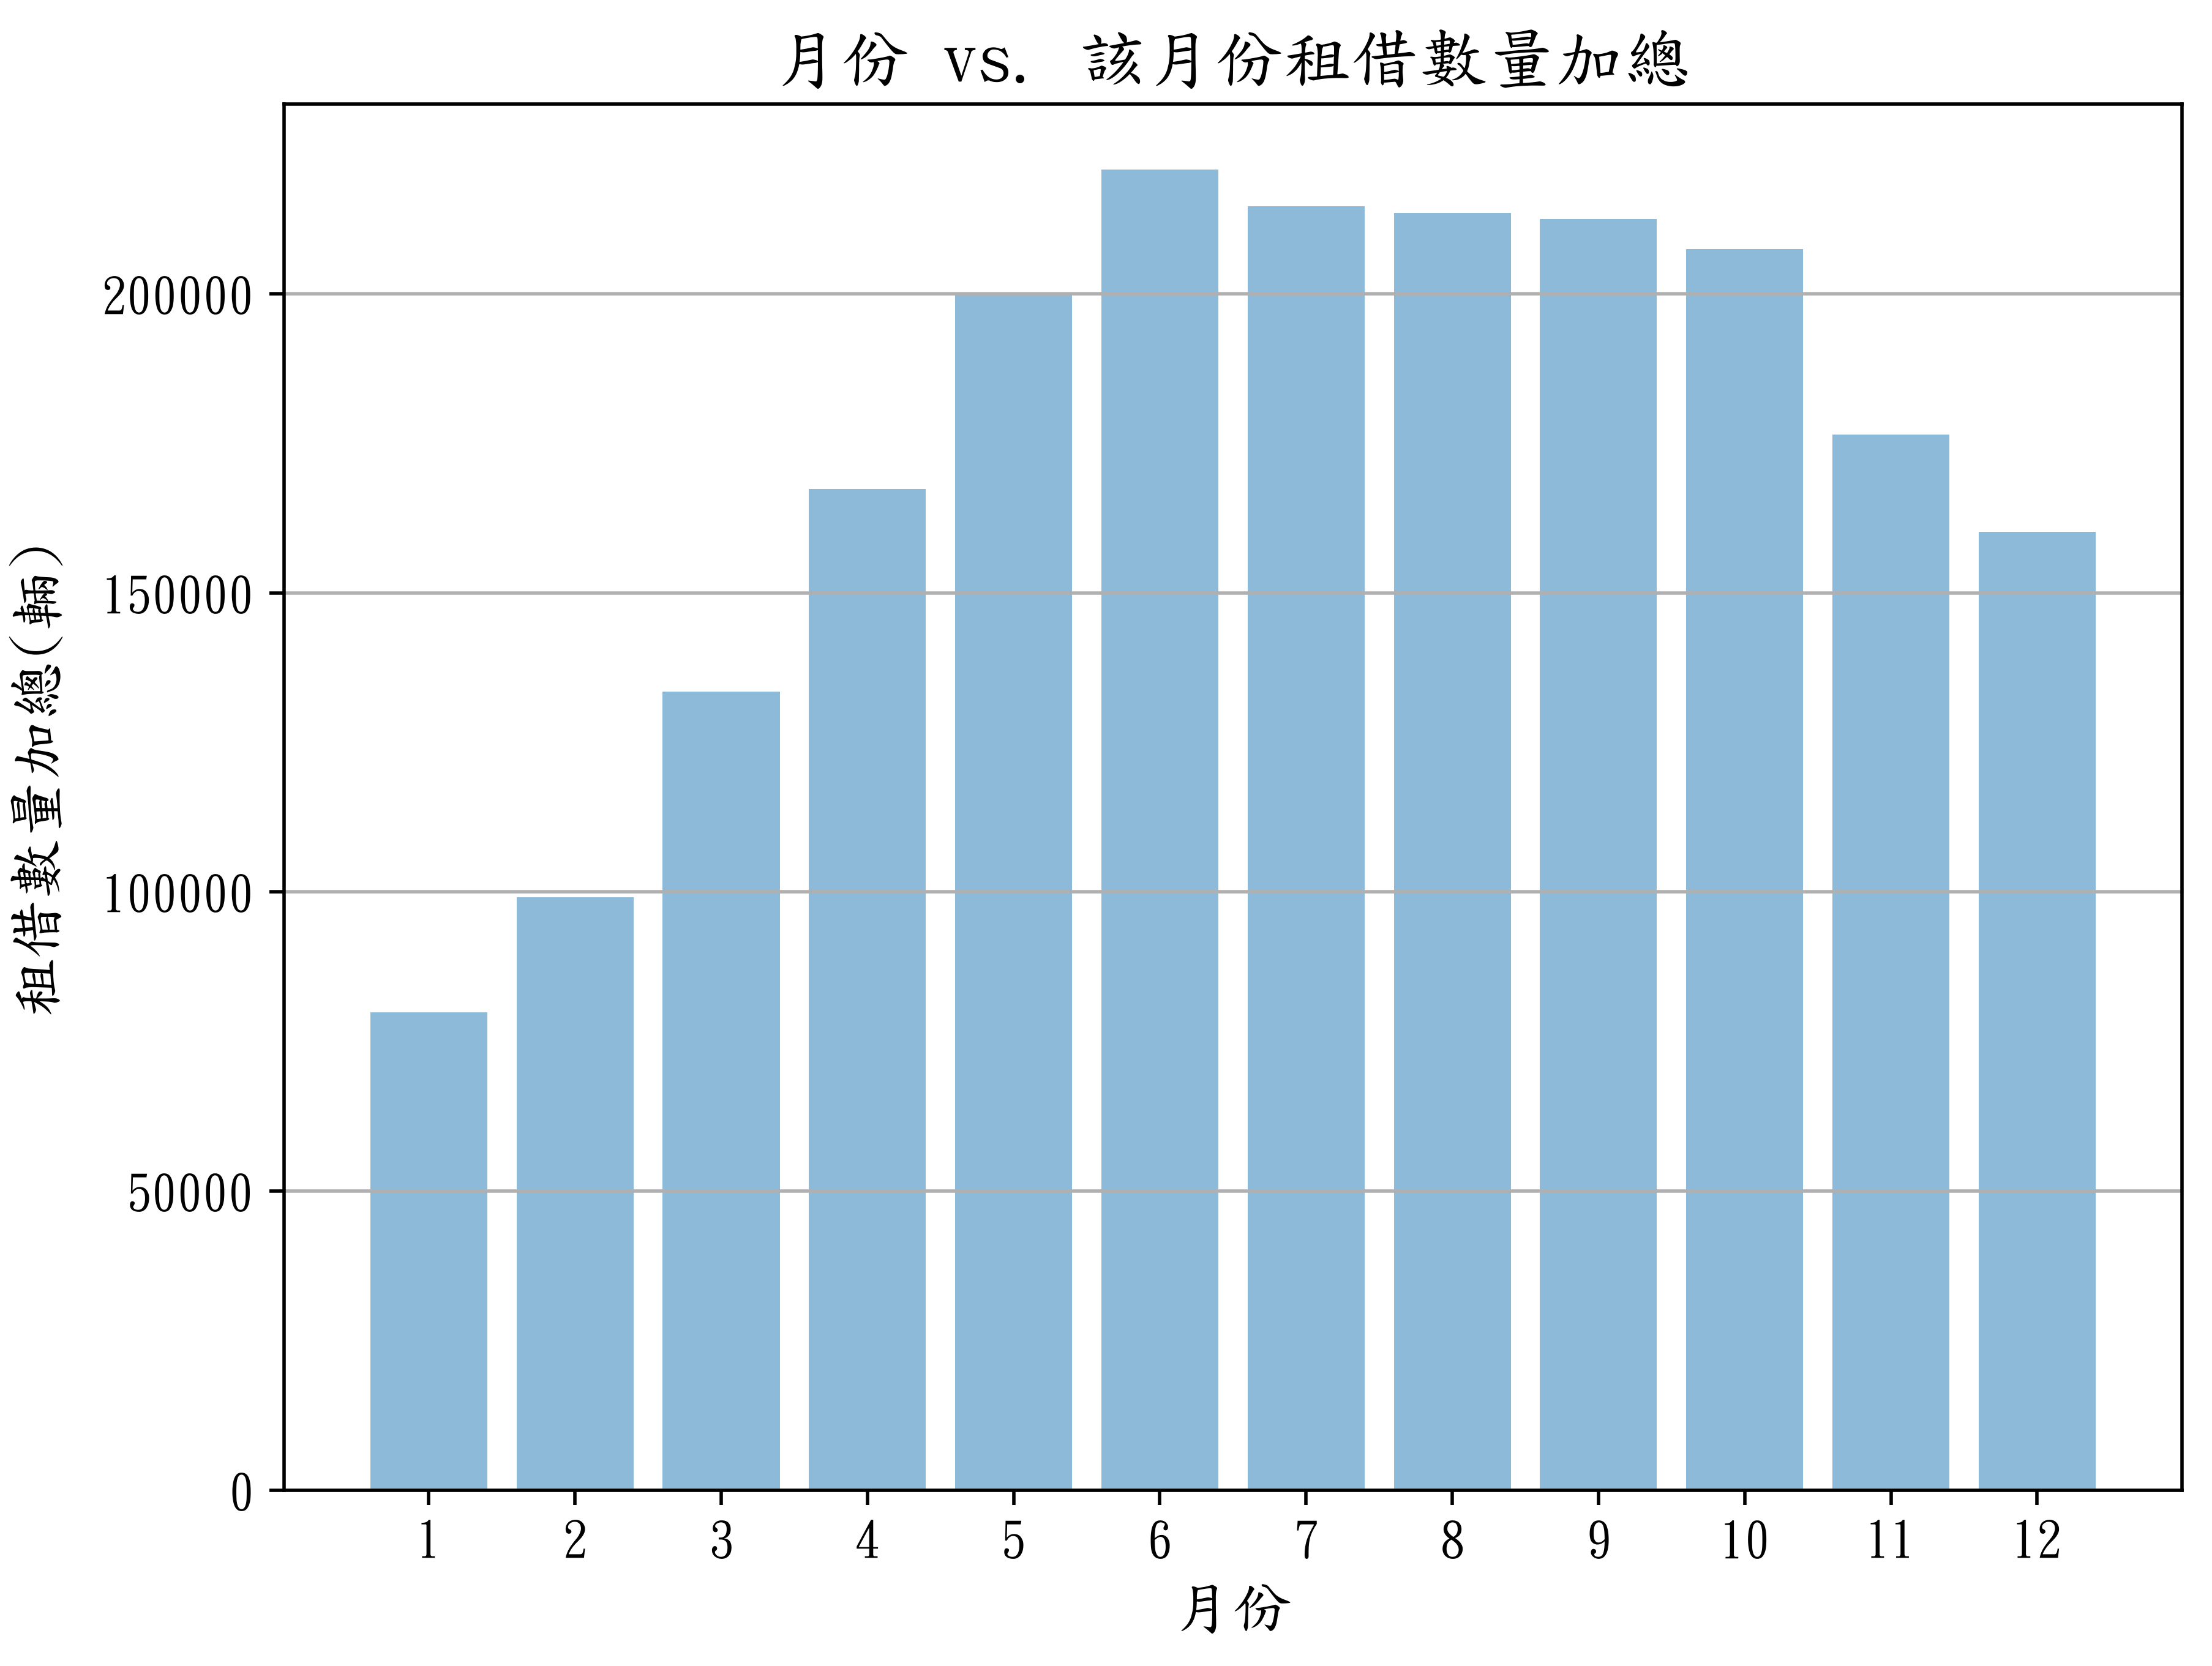

In [8]:
# 探索式資料分析(時間2_月vs.數量)
data = [df[df['month'] == i]['count'].sum() for i in range(1, 13)]
objects = [i+1 for i in range(len(data))]
y_pos = range(len(objects))

plt.figure(figsize=(8, 6), dpi=500)
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('月份', fontsize=14)
plt.ylabel('租借數量加總(輛)', fontsize=14)
plt.title('月份 vs. 該月份租借數量加總', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y')
# plt.show()

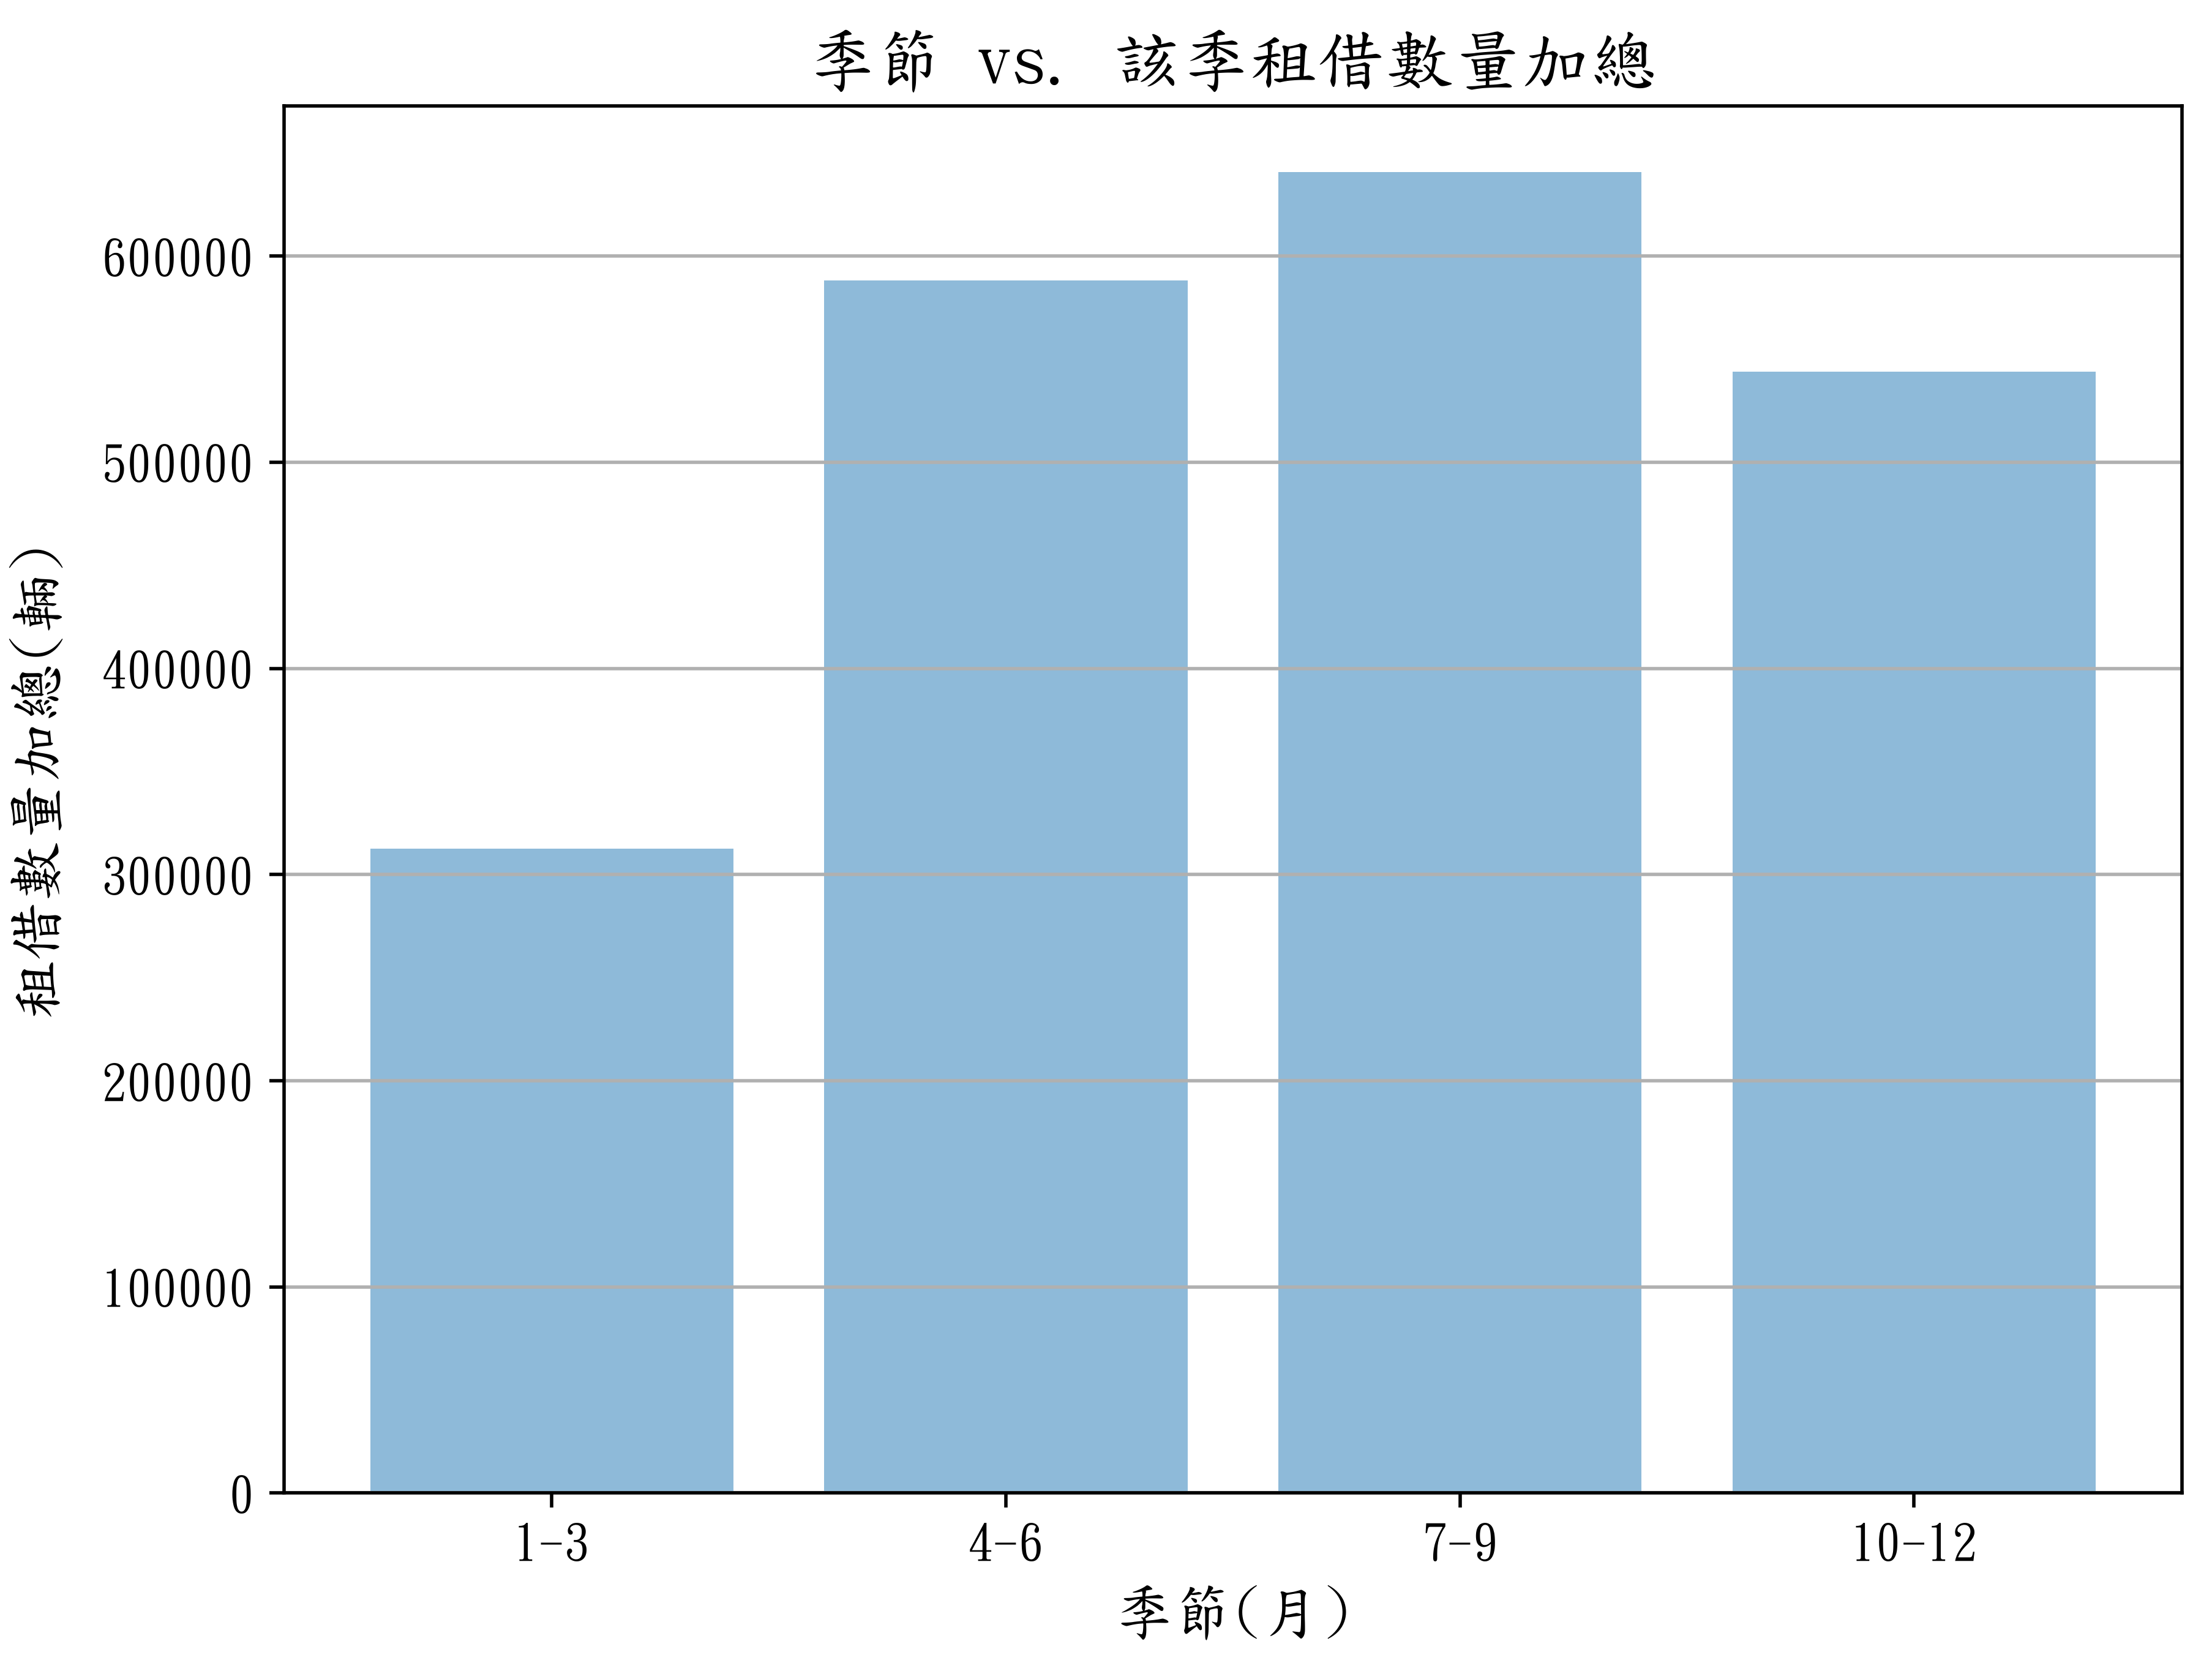

In [9]:
# 探索式資料分析(時間3_季節vs.數量)
data = [int(df[df["season"] ==  i+1][['count']].sum()) for i in range(4)]
objects = ['1-3', '4-6', '7-9', '10-12']
y_pos = range(len(objects))

plt.figure(figsize=(8, 6), dpi=500)
plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.xlabel('季節(月)', fontsize=14)
plt.ylabel('租借數量加總(輛)', fontsize=14)
plt.title('季節 vs. 該季租借數量加總', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.grid(axis='y')
# plt.show()

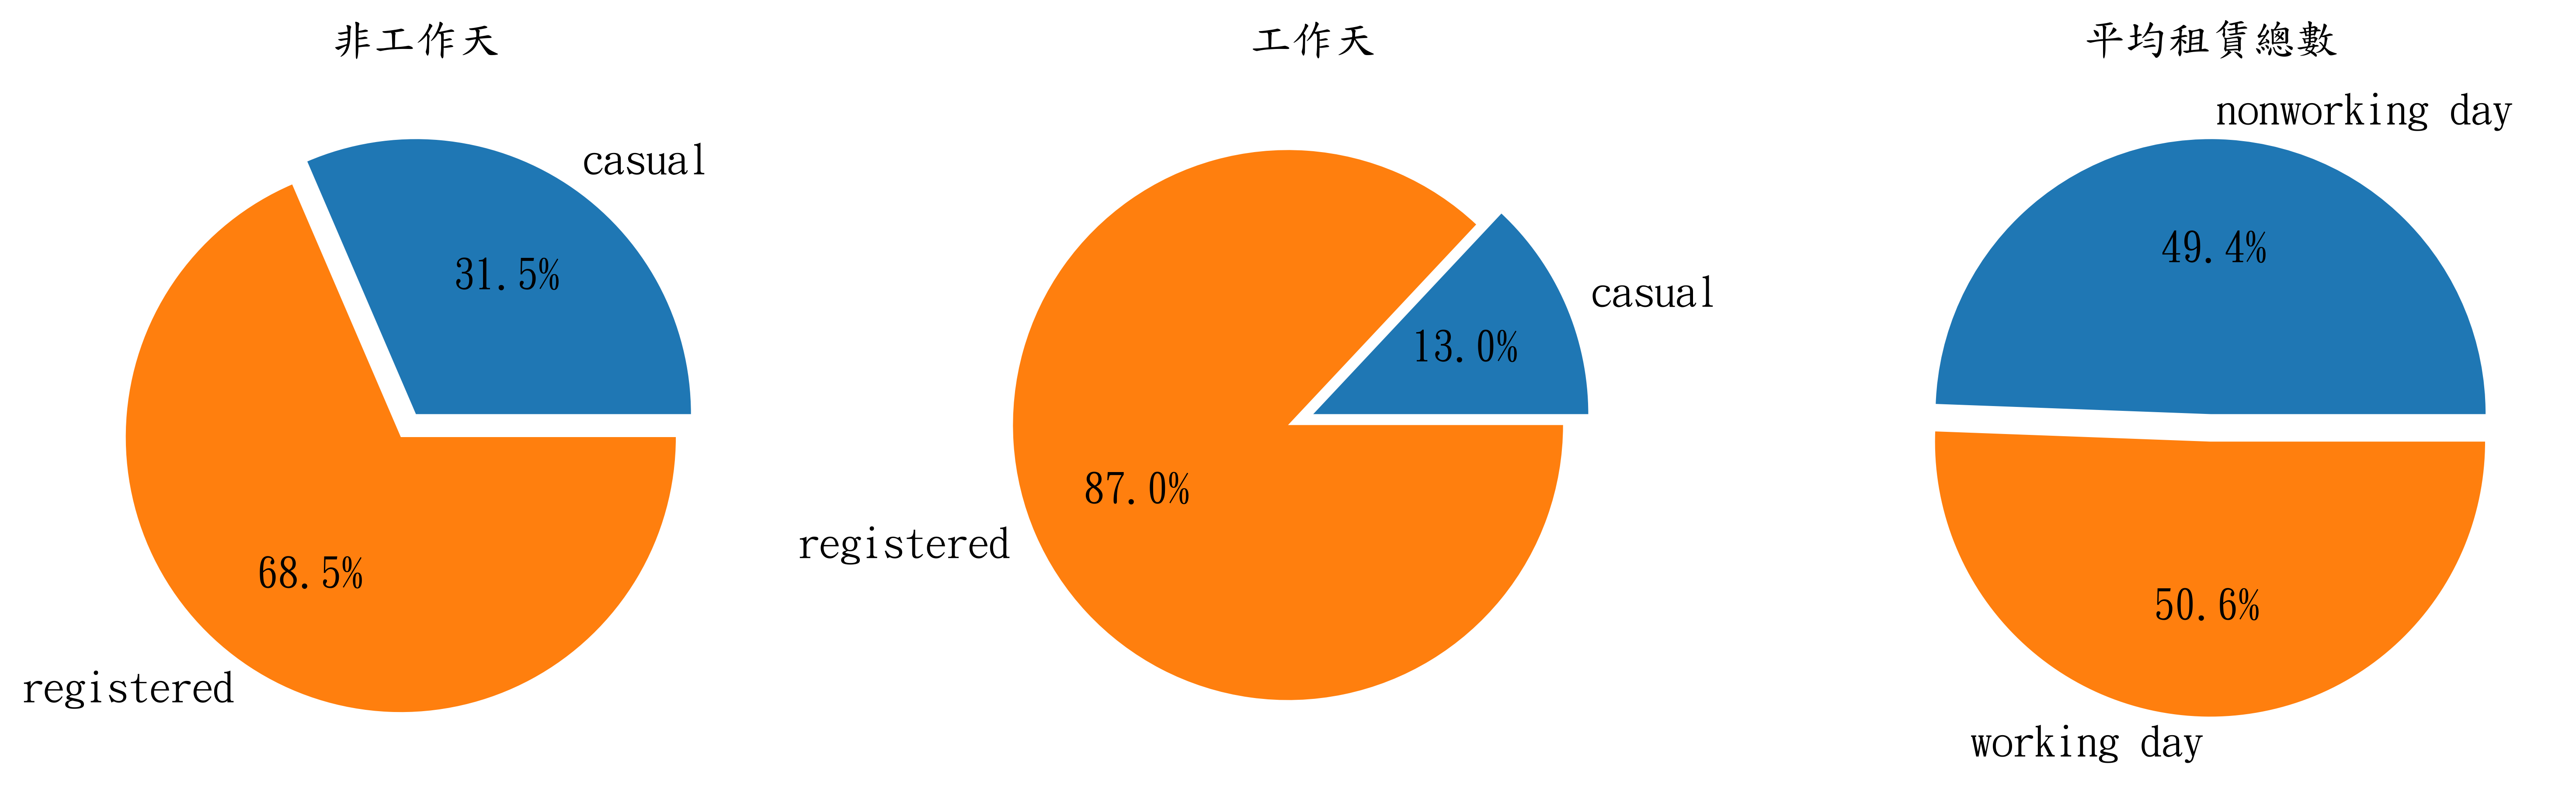

In [10]:
# 探索式資料分析(時間4_工作日/非工作日vs.數量)
data = [df[df["workingday"] ==  i][['casual', 'registered']].mean(axis=0).tolist() for i in range(2)]
labels = 'casual', 'registered'

# define to draw 1rows 3cols subplots.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8), dpi=500)
# fig.suptitle('Title if you need\n', fontsize=16)

ax1.pie(data[0], labels=labels, explode=(0, 0.1), autopct='%1.1f%%', textprops={'fontsize': 14})
ax1.set_title(f"非工作天", fontsize=14)
ax2.pie(data[1], labels=labels, explode=(0, 0.1), autopct='%1.1f%%', textprops={'fontsize': 14})
ax2.set_title(f"工作天", fontsize=14)
labels = 'nonworking day', 'working day'
ax3.pie([sum(data[0]), sum(data[1])], labels=labels, explode=(0, 0.1), autopct='%1.1f%%', textprops={'fontsize': 14})
ax3.set_title(f"平均租賃總數", fontsize=14)
fig.tight_layout()
# plt.show()

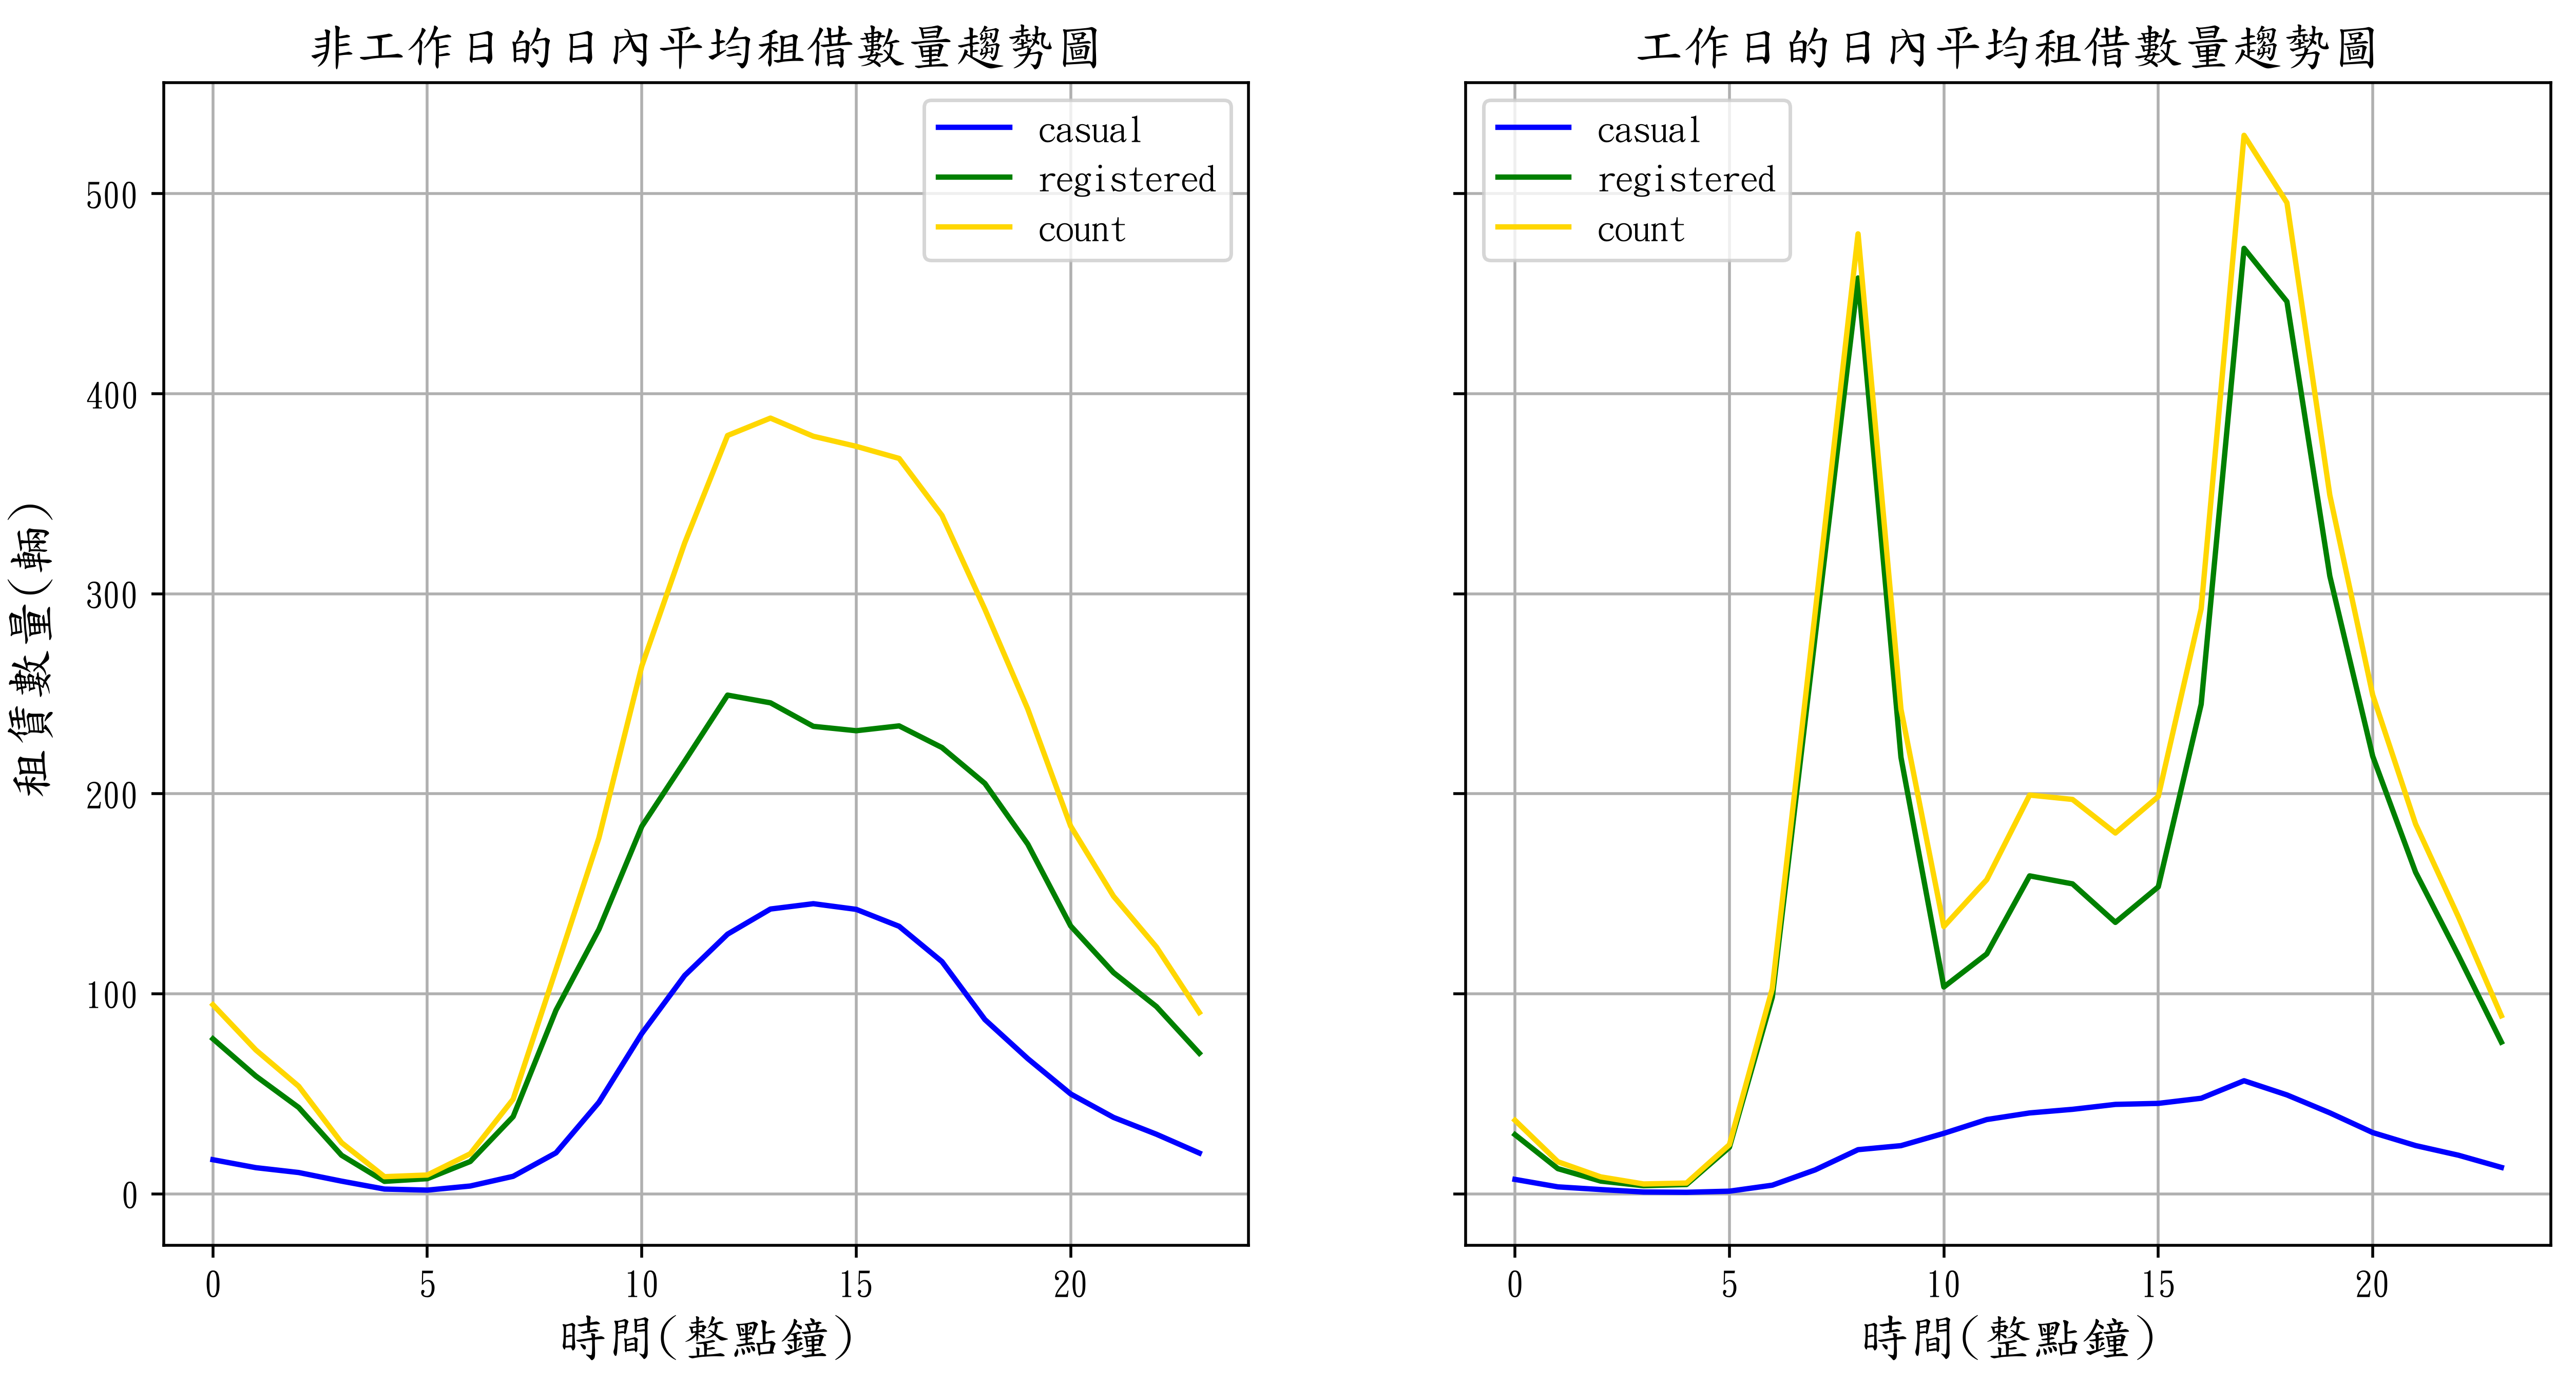

In [11]:
data1 = [df[(df['workingday'] == 0) & (df['hour'] == i)]['casual'].mean() for i in range(24)]
data2 = [df[(df['workingday'] == 0) & (df['hour'] == i)]['registered'].mean() for i in range(24)]
data3 = [df[(df['workingday'] == 0) & (df['hour'] == i)]['count'].mean() for i in range(24)]
data4 = [df[(df['workingday'] == 1) & (df['hour'] == i)]['casual'].mean() for i in range(24)]
data5 = [df[(df['workingday'] == 1) & (df['hour'] == i)]['registered'].mean() for i in range(24)]
data6 = [df[(df['workingday'] == 1) & (df['hour'] == i)]['count'].mean() for i in range(24)]

objects = [i for i in range(len(data1))]
y_pos = range(len(objects))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), dpi=500, sharey='all')
ax1.plot(y_pos, data1, color='b', label='casual')
ax1.plot(y_pos, data2, color='g', label='registered')
ax1.plot(y_pos, data3, color='gold', label='count')
ax1.set_xlabel('時間(整點鐘)', fontsize=14)
ax1.set_ylabel('租賃數量(輛)', fontsize=14)
ax1.set_title("非工作日的日內平均租借數量趨勢圖", fontsize=14)
ax1.grid()
ax1.legend(loc='best')

ax2.plot(y_pos, data4, color='b', label='casual')
ax2.plot(y_pos, data5, color='g', label='registered')
ax2.plot(y_pos, data6, color='gold', label='count')
ax2.set_xlabel('時間(整點鐘)', fontsize=14)
ax2.set_title("工作日的日內平均租借數量趨勢圖", fontsize=14)
ax2.grid()
ax2.legend(loc='best')
# plt.show()

(-1.1305539570382381, 1.36335970427033, -1.134884768954459, 1.1156453966755993)

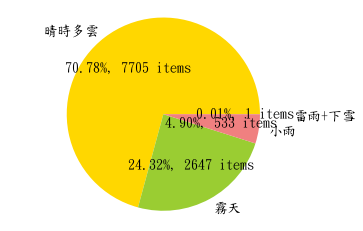

In [12]:
# 探索式資料分析5
data1 = [len(df[df["weather"] ==  i+1]) for i in range(4)]  # 該天氣狀態數量
data2 = [int(df[df["weather"] ==  i+1][['count']].sum()) for i in range(4)]  # 租借數量
labels = ['晴時多雲', '霧天', '小雨', '雷雨+下雪']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1

# 繪租借數量比例/ 該天氣狀態數量
plt.pie(data2, labels=labels, colors=colors, explode=(0, 0, 0, 0.25), autopct=lambda p:f'{p:.2f}%, {p*sum(data1)/100 :.0f} items', 
        textprops={'fontsize': 14})
plt.axis('equal')
# plt.show()

([<matplotlib.axis.XTick at 0x7f5eee654350>,
 [Text(0, 0, '2011-01'),
  Text(0, 0, '2011-05'),
  Text(0, 0, '2011-09'),
  Text(0, 0, '2012-01'),
  Text(0, 0, '2012-05'),
  Text(0, 0, '2012-09')])

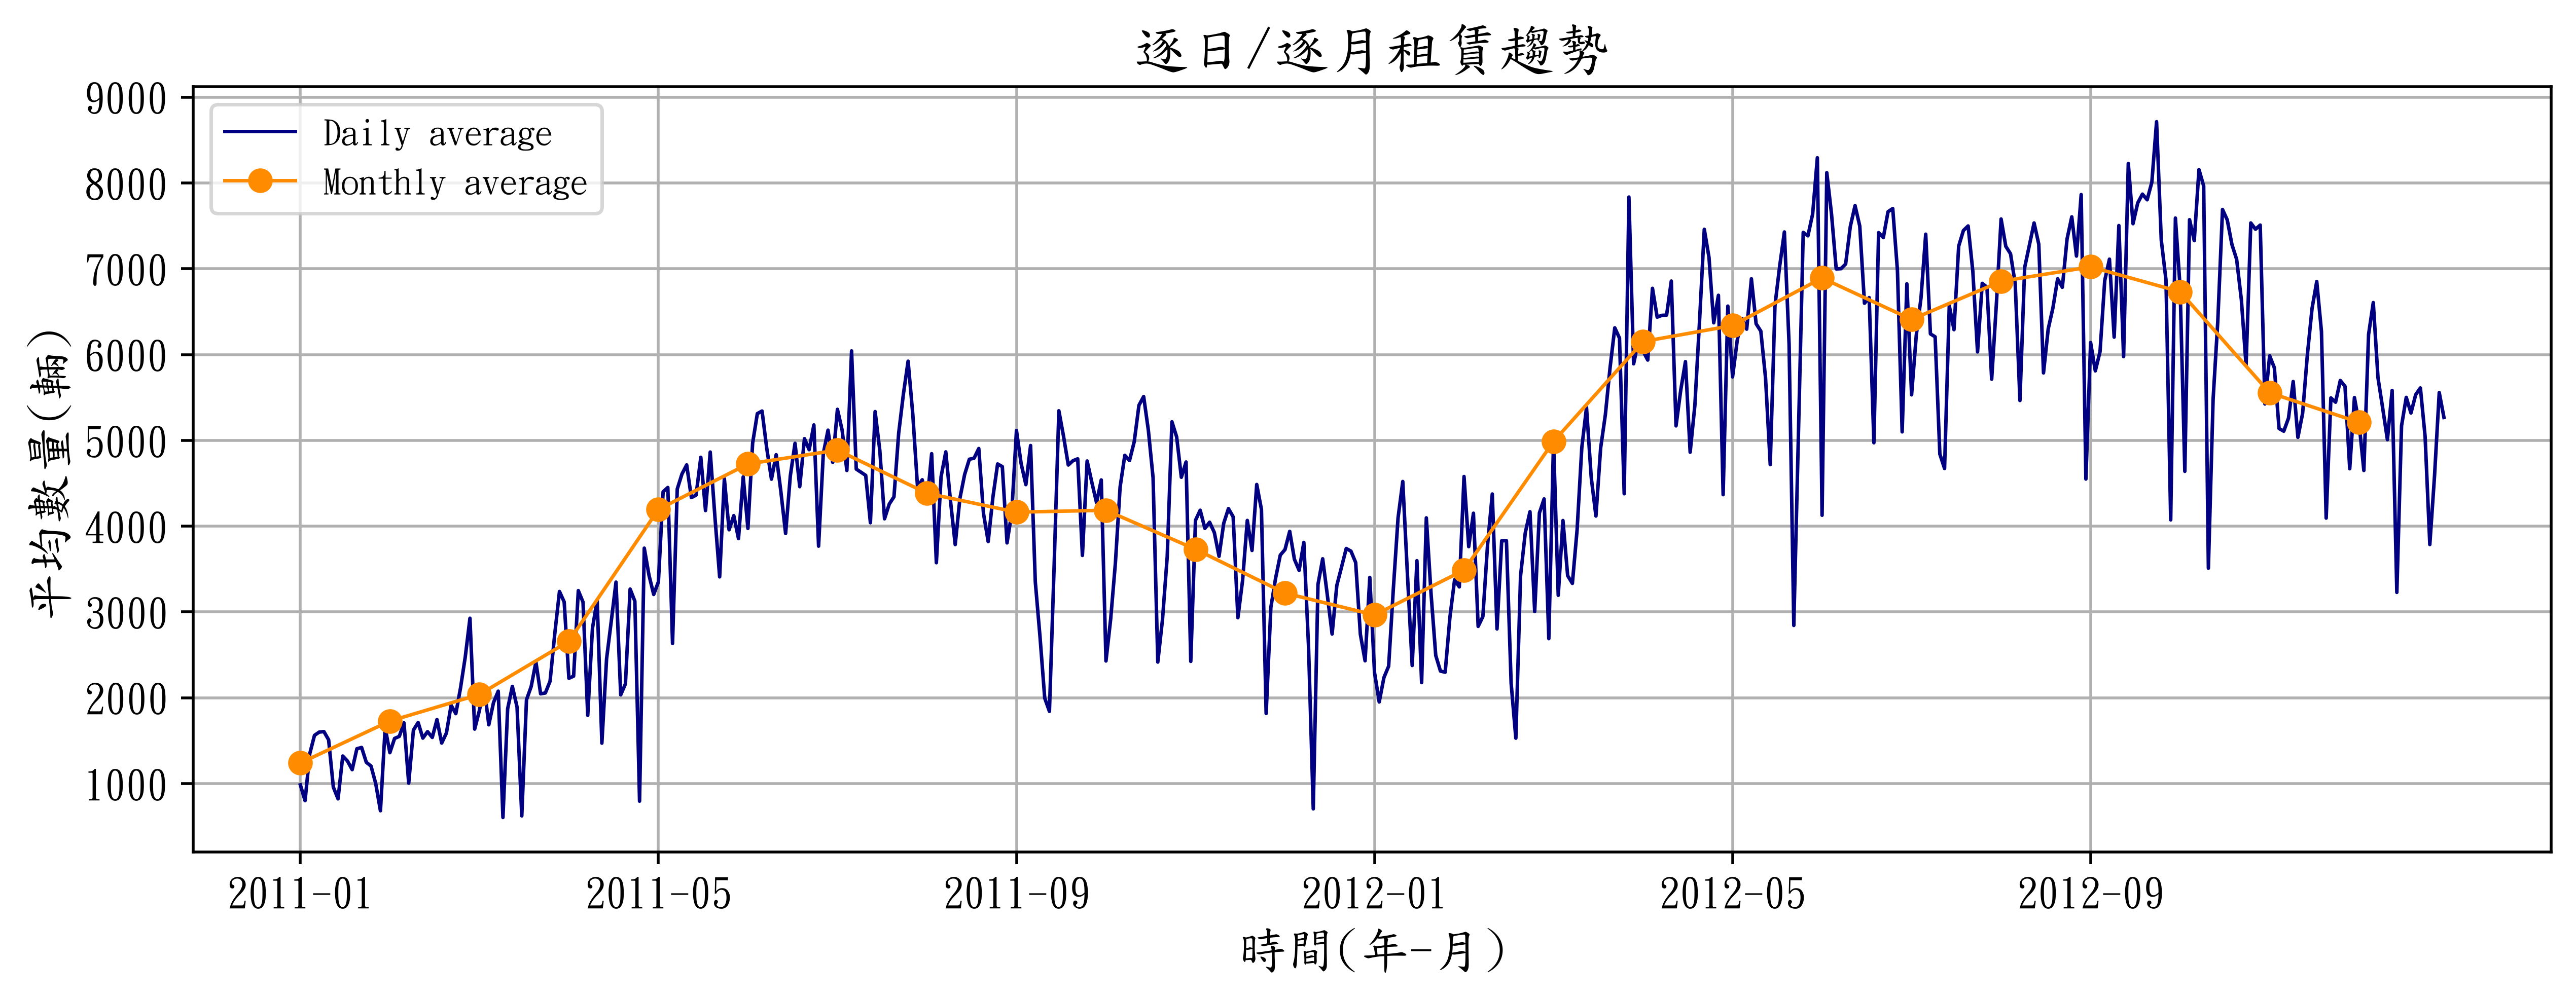

In [13]:
# 探索式資料分析(參考1，時間分析)
monthly_average = {y + '-' + f'{m:02}': df[df["datetime"].str.contains(y + '-' + f'{m:02}')]['count'].sum()/19 for y in ['2011', '2012'] for m in range(1, 13)}
daily_average = [df[df['datetime'].str.contains(f'{y}-{m:02}-{d:02}')]['count'].sum() for y in ['2011', '2012'] for m in range(1, 13) for d in range(1, 20)]
# print(len(monthly_average.values()), len(daily_average))
seq1 = range(0, len(daily_average), int(len(daily_average)/len(monthly_average)))
seq2 = range(len(daily_average))

plt.figure(figsize=(12, 4), dpi=500)
plt.plot(seq2, daily_average, color='navy', label='Daily average', linewidth=1)
plt.plot(seq1, list(monthly_average.values()), '-o', color='darkorange', label='Monthly average', linewidth=1)
plt.title("逐日/逐月租賃趨勢", fontsize=16)
plt.xlabel("時間(年-月)", fontsize=14)
plt.ylabel("平均數量(輛)", fontsize=14)
plt.grid()
plt.tick_params(axis='both', labelsize=12)
plt.legend(loc='best')
plt.xticks(range(0, 456, 76), [list(monthly_average.keys())[x//19] for x in range(0, 456, 76)])
# plt.show()

(-1.1913017078986678,
 1.104347700376127,
 -1.158284721497757,
 1.0496852579301148)

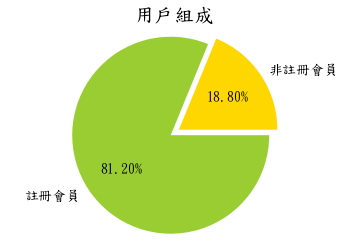

In [14]:
# 探索式資料分析(參考2)
data = [df['casual'].sum(), df['registered'].sum()]
labels = '非註冊會員', '註冊會員'
# plt.figure(figsize=(4, 4), dpi=500)
plt.title('用戶組成', fontsize=20)
plt.pie(data, labels=labels, colors=colors, explode=(0, 0.1), autopct=lambda p:f'{p:.2f}%', textprops={'fontsize': 14})
plt.axis('equal')
# plt.show()

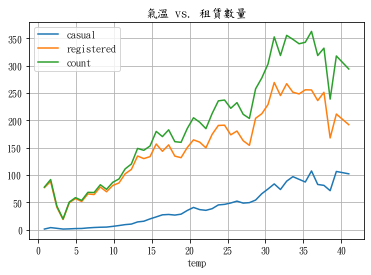

In [15]:
# 探索式資料分析(天氣1_氣溫vs.數量)
temp_count = df.groupby(['temp'], as_index=True).agg({'casual':'mean', 'registered':'mean', 'count':'mean'})
temp_count.plot(title='氣溫 vs. 租賃數量')
plt.grid()
# plt.show()

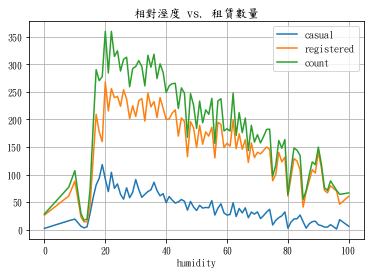

In [16]:
# 探索式資料分析(天氣2_相對溼度vs.數量)
temp_count = df.groupby(['humidity'], as_index=True).agg({'casual':'mean', 'registered':'mean', 'count':'mean'})
temp_count.plot(title='相對溼度 vs. 租賃數量')
plt.grid()
# plt.show()

Text(0, 0.5, '租賃數量')

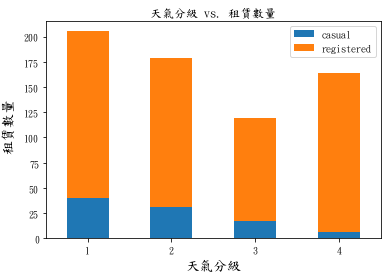

In [17]:
weather_df = df.groupby('weather', as_index=True).agg({'casual':'mean', 'registered':'mean'})
weather_df.plot.bar(stacked=True, title='天氣分級 vs. 租賃數量', rot=0)
plt.xlabel('天氣分級', fontsize=14)
plt.ylabel('租賃數量', fontsize=14)
# plt.show()

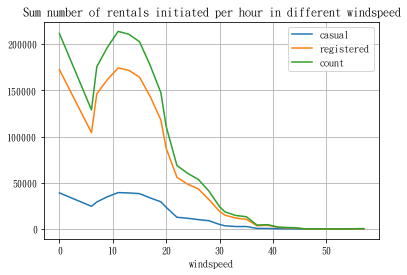

In [18]:
windspeed_rentals = df.groupby(['windspeed'], as_index=True).agg({'casual':'sum', 'registered':'sum', 'count':'sum'})
windspeed_rentals .plot(title = 'Sum number of rentals initiated per hour in different windspeed')
plt.grid()
# plt.show()

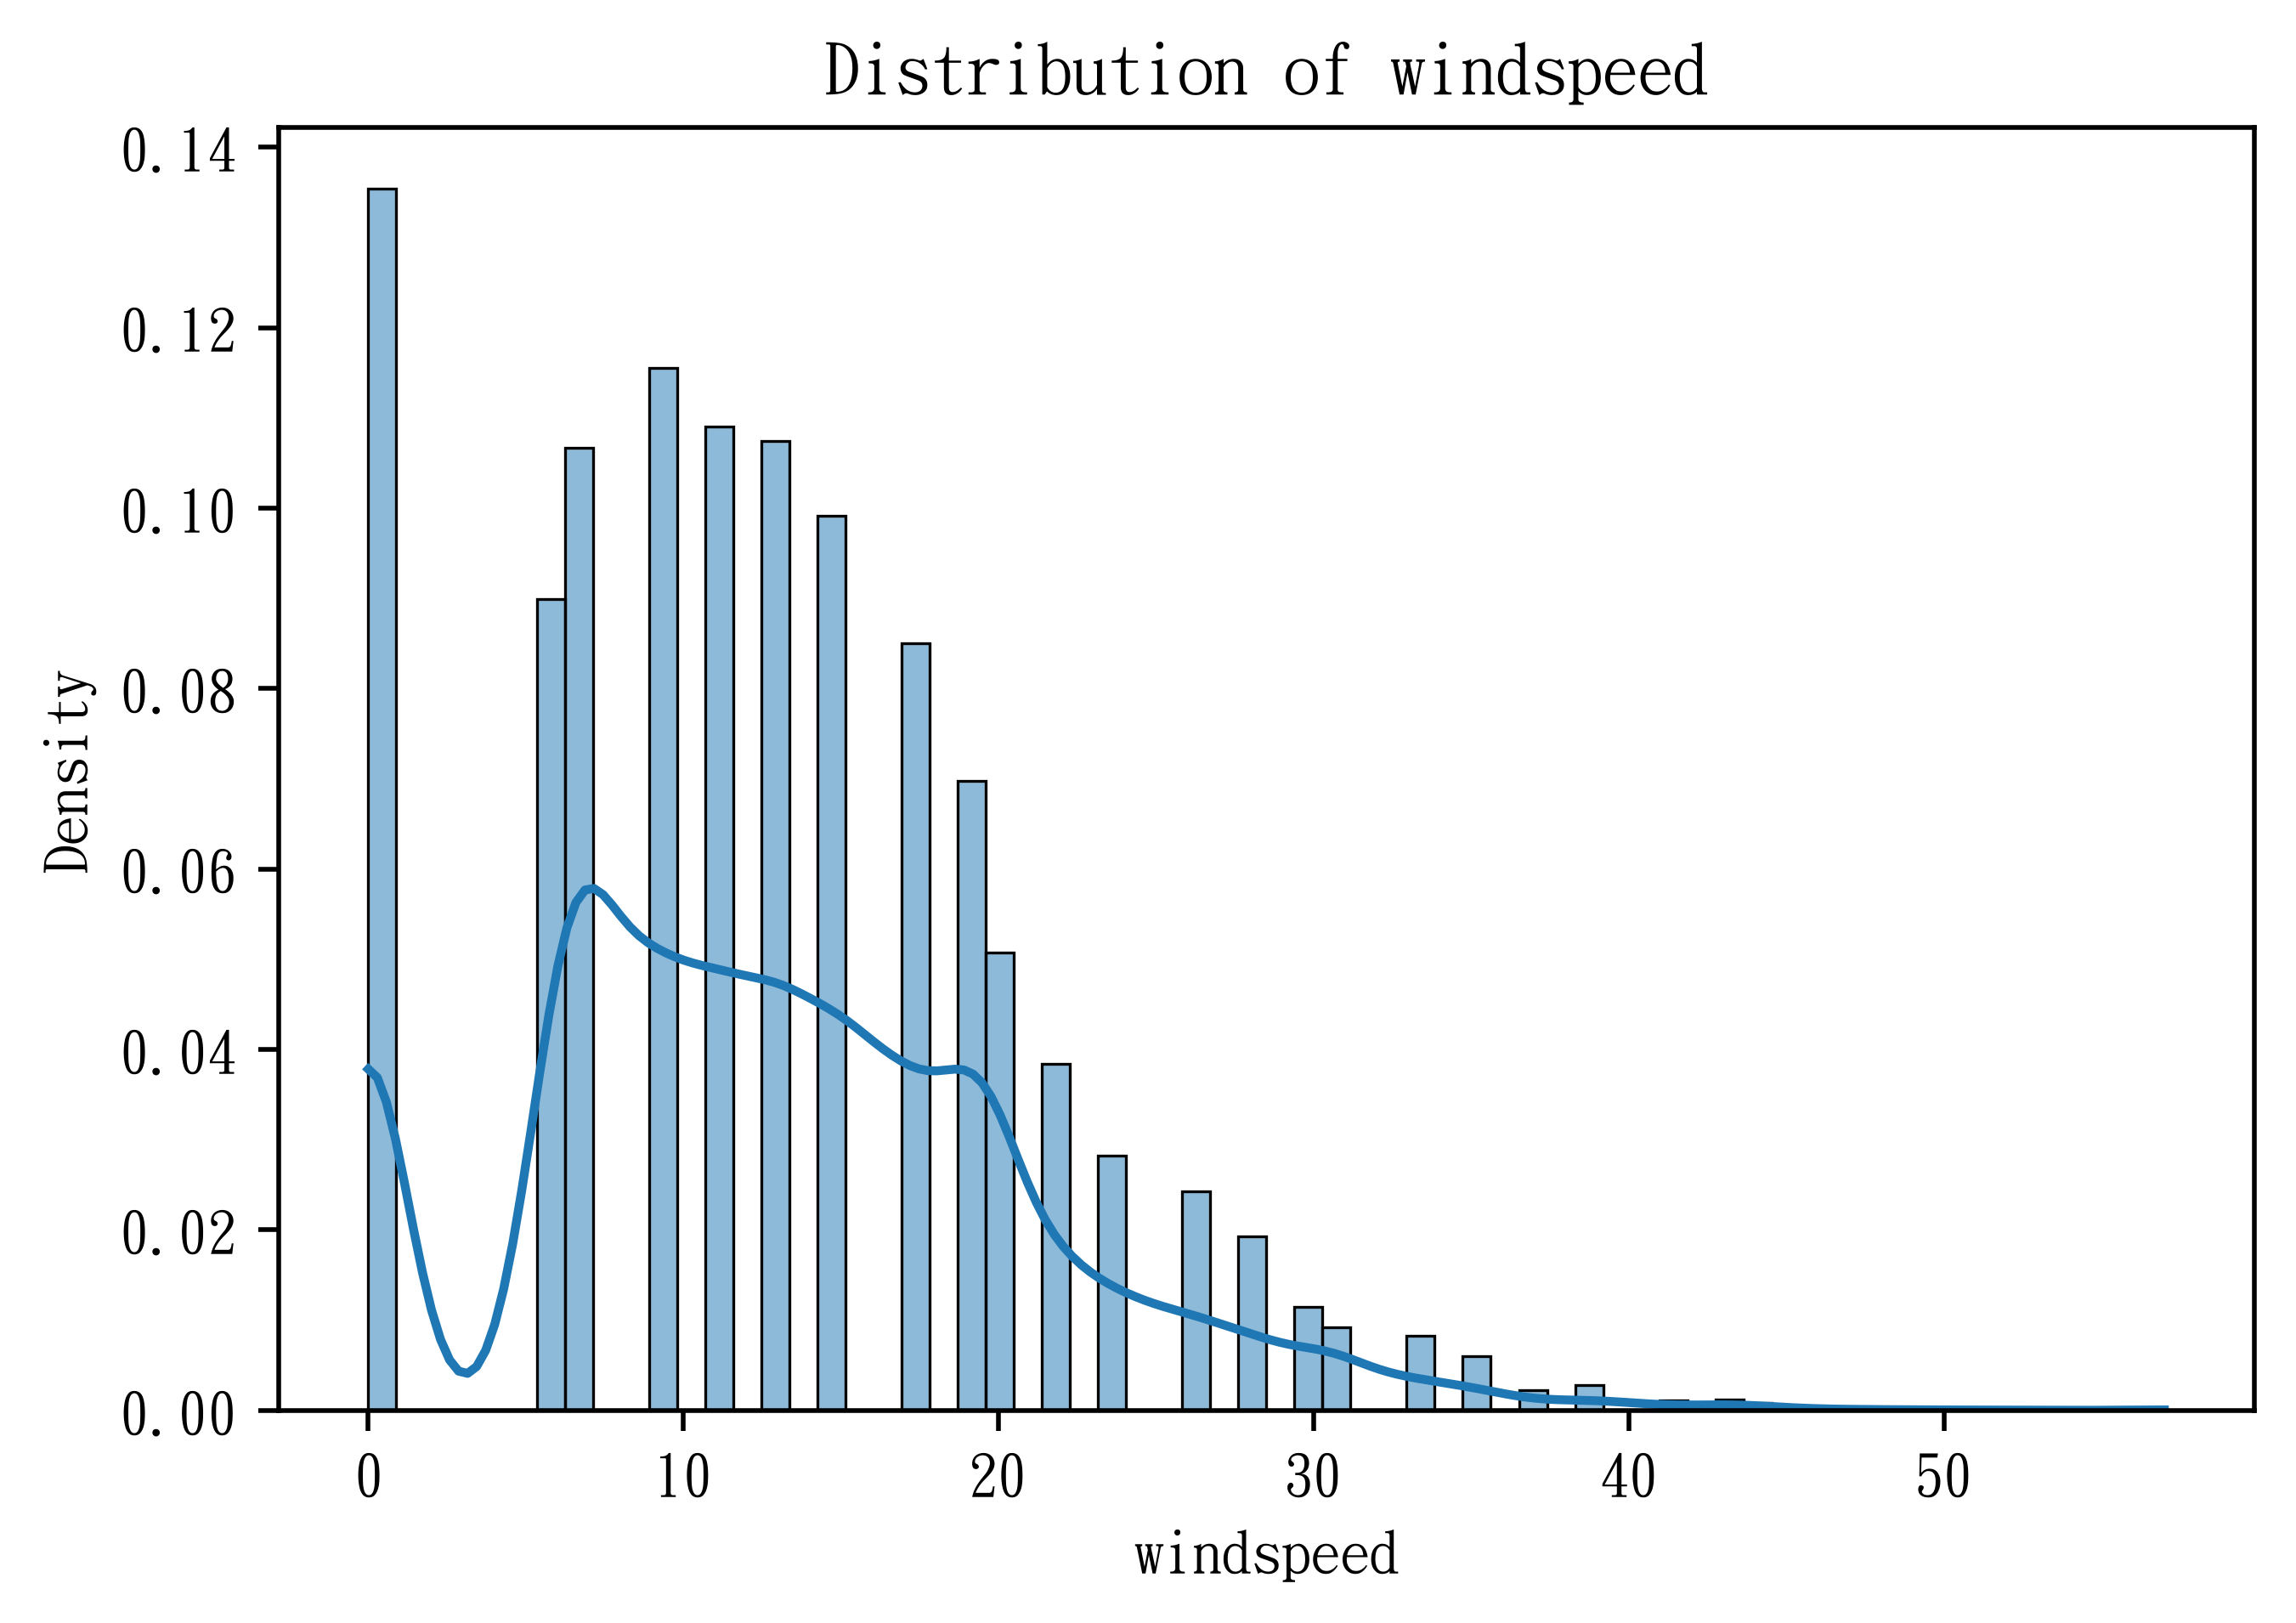

In [19]:
# distribution of windspeed
fig = plt.figure(dpi=500)
ax = fig.add_subplot(1, 1, 1)
ax.set(xlabel='windspeed', title='Distribution of windspeed')
sns.histplot(df['windspeed'], stat='density', kde=True)
# plt.show()

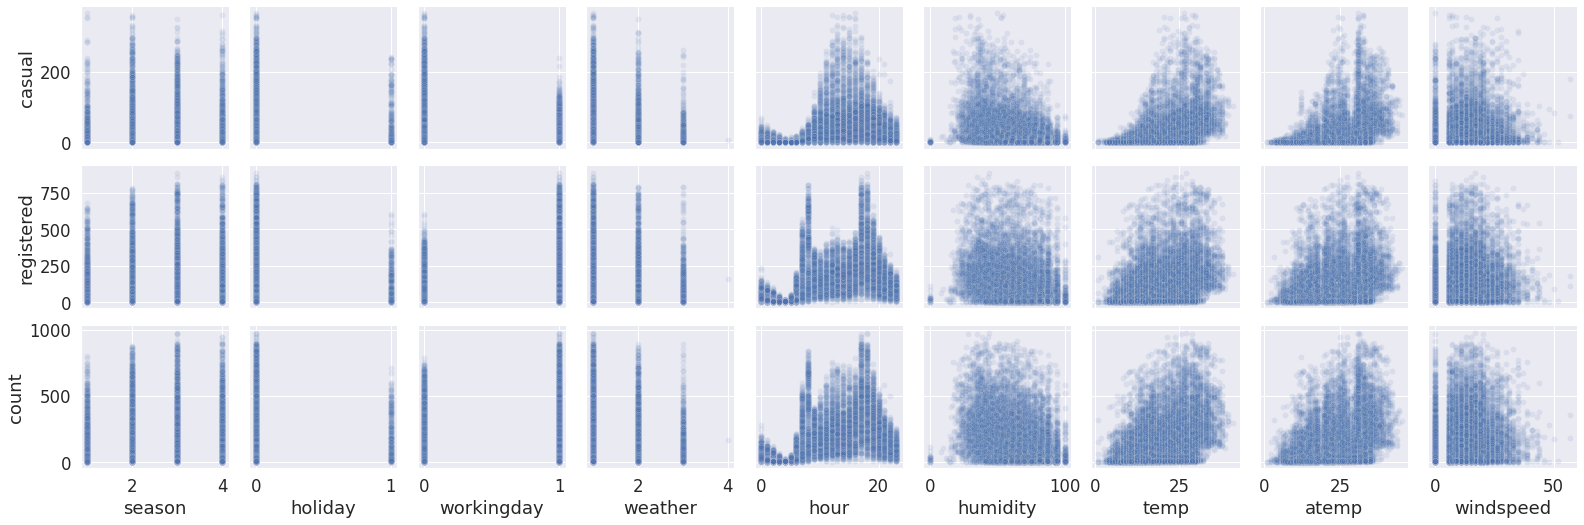

In [20]:
# 探索式資料分析(參考3，變數綜合分析)
sns.set(font_scale=1.5)
pairplots = sns.pairplot(df,
            x_vars=['season', 'holiday', 'workingday', 'weather', 'hour', 'humidity', 'temp', 'atemp', 'windspeed'], 
            y_vars=['casual', 'registered', 'count'],
            diag_kind=None,
            plot_kws={'alpha': 0.1})  # plot_kws 控制非對角線上圖的樣式； diag_kws 控制對角線上圖的樣式
# plt.show()

In [21]:
df.insert(15, 'windspeed_imputed', df['windspeed'])
df_wind0 = df[df['windspeed_imputed'] == 0].copy()   # copy() 為了避免警告訊息
df_windnot0 = df[df['windspeed_imputed'] != 0].copy()  # copy() 為了避免警告訊息

rfr_impute_model = RandomForestRegressor(n_estimators=1200, n_jobs=-1, random_state=100)
feature_cols = ['month', 'day', 'hour', 'season', 'weather', 'temp', 'humidity']
rfr_impute_model.fit(df_windnot0[feature_cols], df_windnot0["windspeed_imputed"])
wind_impute_value = rfr_impute_model.predict(df_wind0[feature_cols])
df_wind0['windspeed_imputed'] = wind_impute_value

df = df_windnot0.append(df_wind0)
df.reset_index(inplace=True)
df.drop(['index', 'windspeed'], inplace=True, axis=1)
df.rename(columns={'windspeed_imputed': 'windspeed'}, inplace=True)
df

datetime        date  year  month  day  weekday  hour  \
0      2011-01-01 05:00:00  2011-01-01  2011      1    1        5     5   
1      2011-01-01 10:00:00  2011-01-01  2011      1    1        5    10   
2      2011-01-01 11:00:00  2011-01-01  2011      1    1        5    11   
3      2011-01-01 12:00:00  2011-01-01  2011      1    1        5    12   
4      2011-01-01 13:00:00  2011-01-01  2011      1    1        5    13   
...                    ...         ...   ...    ...  ...      ...   ...   
10881  2012-12-17 12:00:00  2012-12-17  2012     12   17        0    12   
10882  2012-12-17 15:00:00  2012-12-17  2012     12   17        0    15   
10883  2012-12-18 08:00:00  2012-12-18  2012     12   18        1     8   
10884  2012-12-18 22:00:00  2012-12-18  2012     12   18        1    22   
10885  2012-12-19 00:00:00  2012-12-19  2012     12   19        2     0   

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        2   9.84  12.880        75   
1           1        0           0        1  15.58  19.695        76   
2           1        0           0        1  14.76  16.665        81   
3           1        0           0        1  17.22  21.210        77   
4           1        0           0        2  18.86  22.725        72   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        2  16.40  20.455        87   
10882       4        0           1        2  17.22  21.210        88   
10883       4        0           1        1  15.58  19.695        94   
10884       4        0           1        1  13.94  16.665        49   
10885       4        0           1        1  12.30  15.910        61   

       windspeed  casual  registered  count  
0       6.003200       0           1      1  
1      16.997900      12          24     36  
2      19.001200      26          30     56  
3      19.001200      29          55     84  
4      19.999500      47          47     94  
...          ...     ...         ...    ...  
10881   9.012661      21         211    232  
10882   9.139939      15         196    211  
10883   9.075708      10         652    662  
10884  11.605634       5         127    132  
10885  11.778667       6          35     41  

[10886 rows x 18 columns]

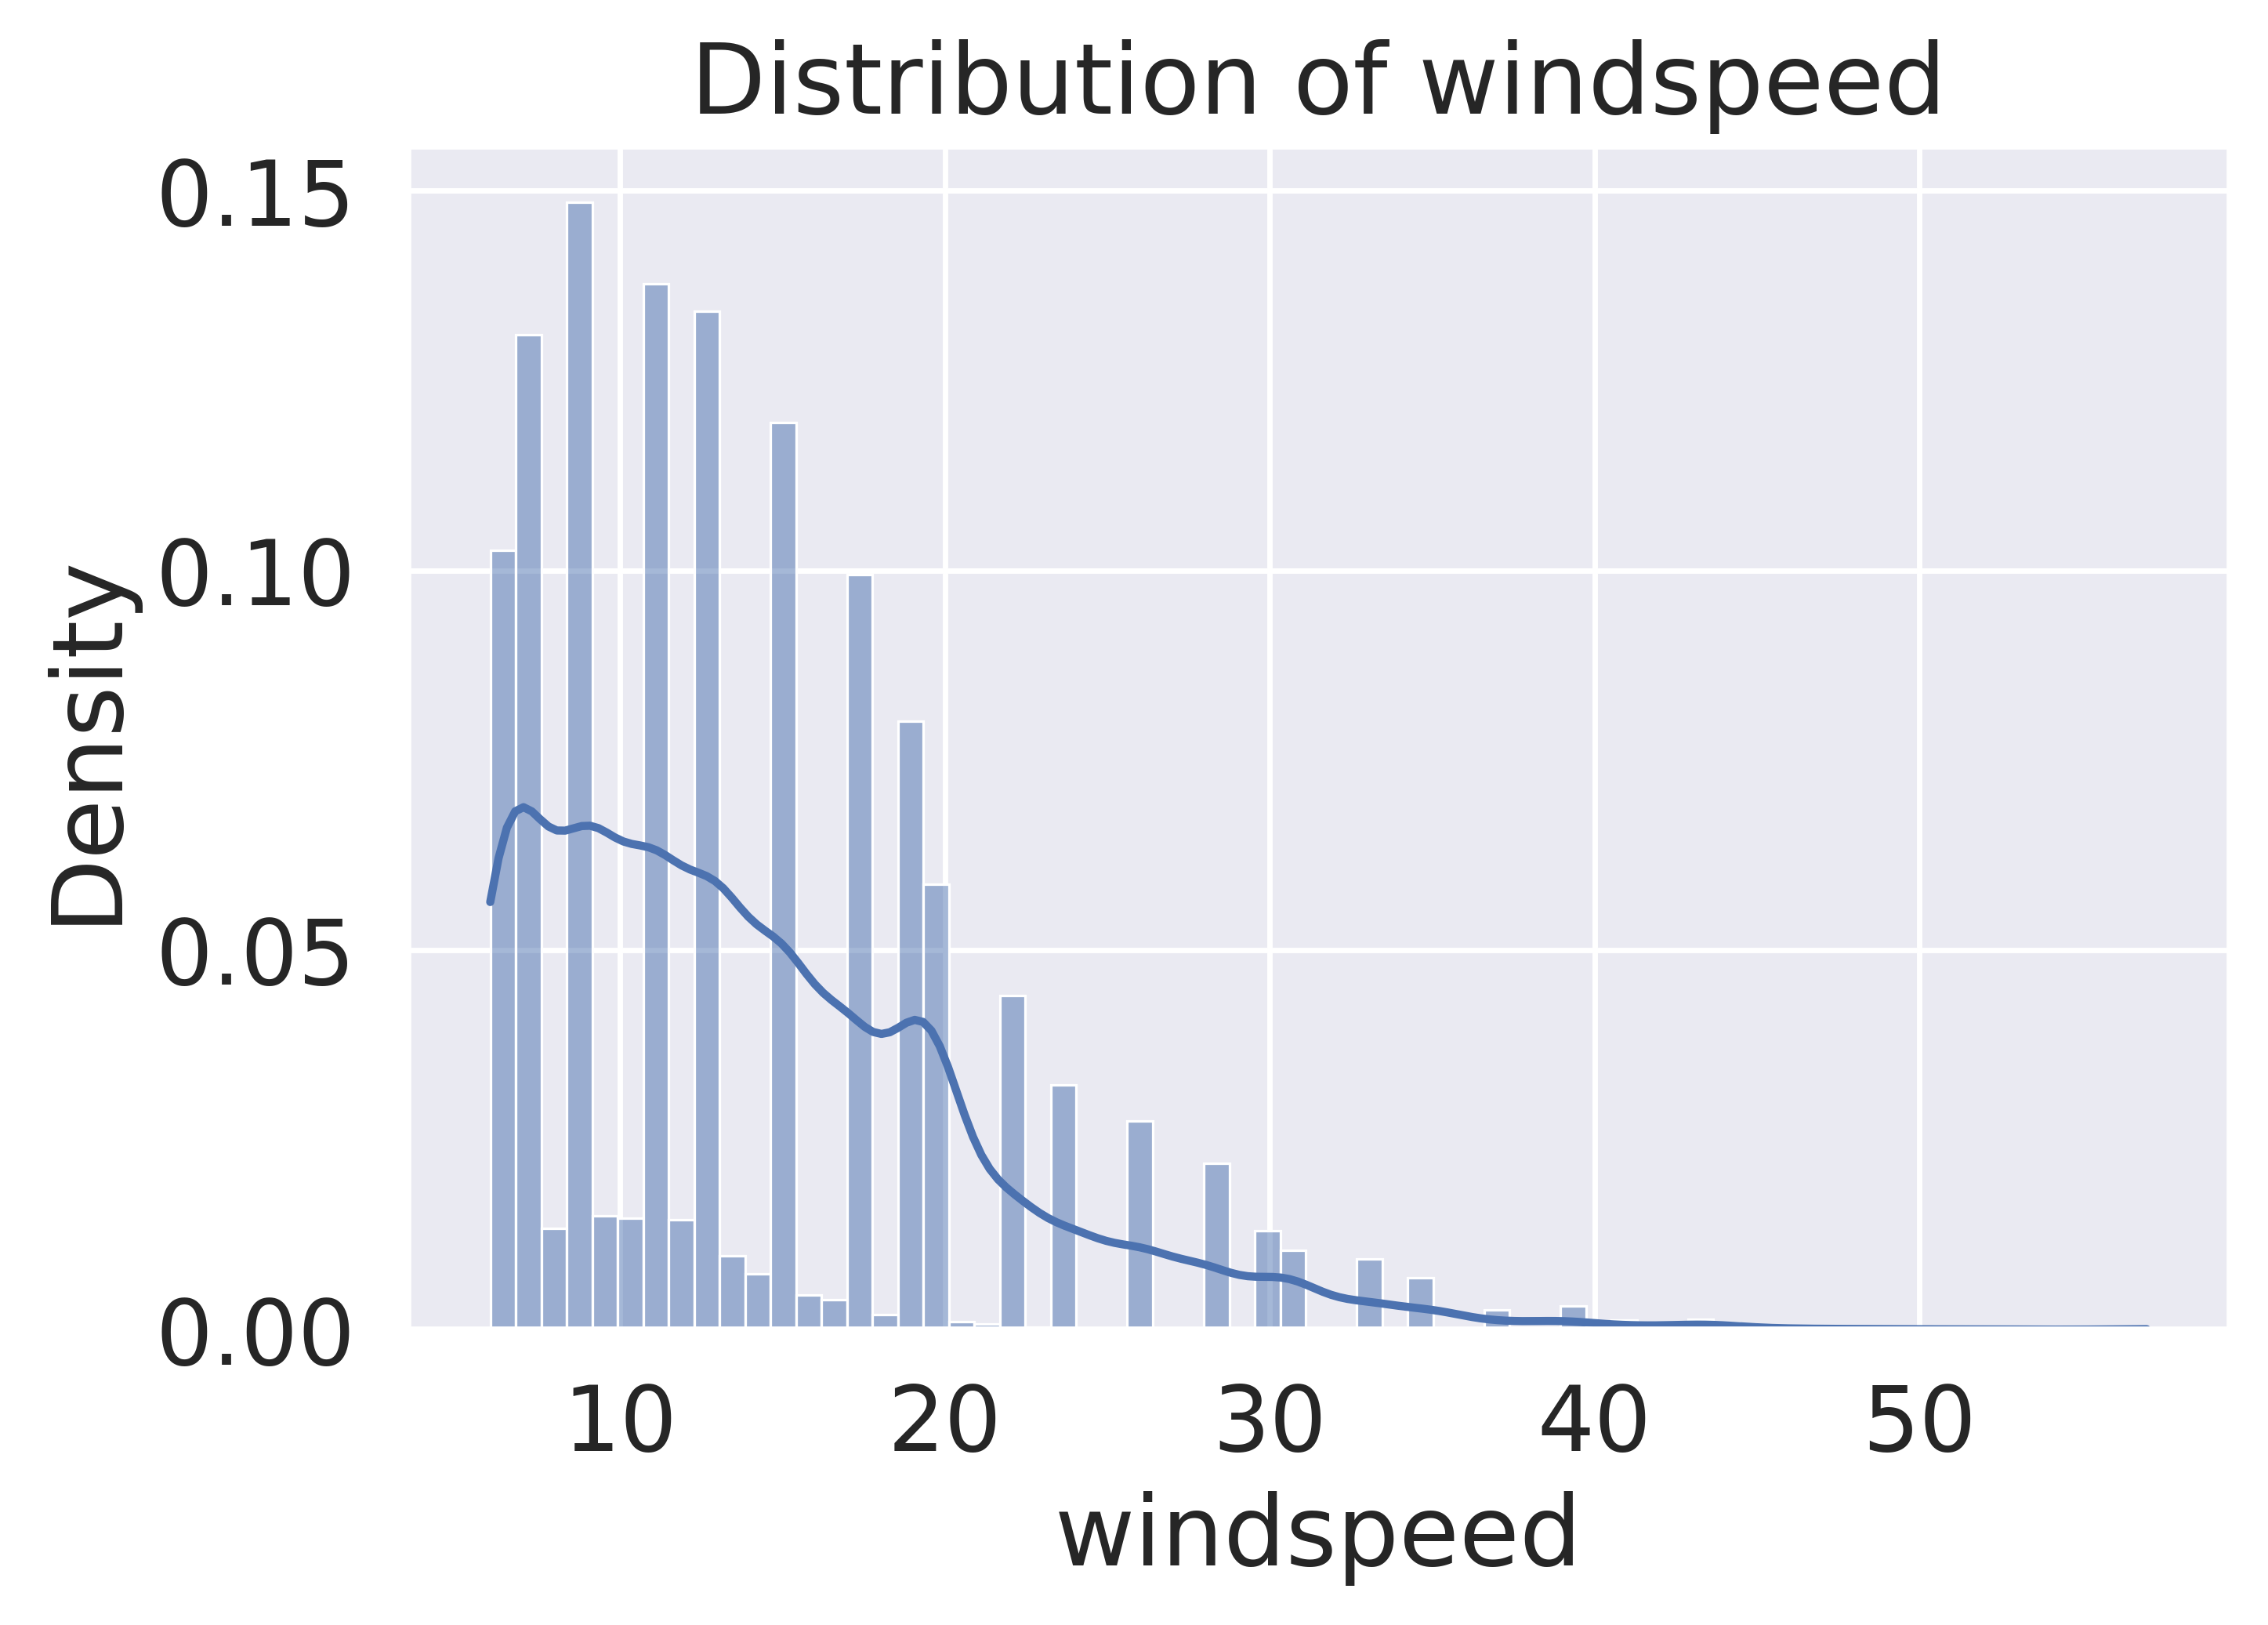

In [22]:
# distribution of windspeed (after impute)
fig = plt.figure(dpi=500)
ax = fig.add_subplot(1, 1, 1)
ax.set(xlabel='windspeed', title='Distribution of windspeed')
sns.histplot(df['windspeed'], stat='density', kde=True)
# plt.show()

(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

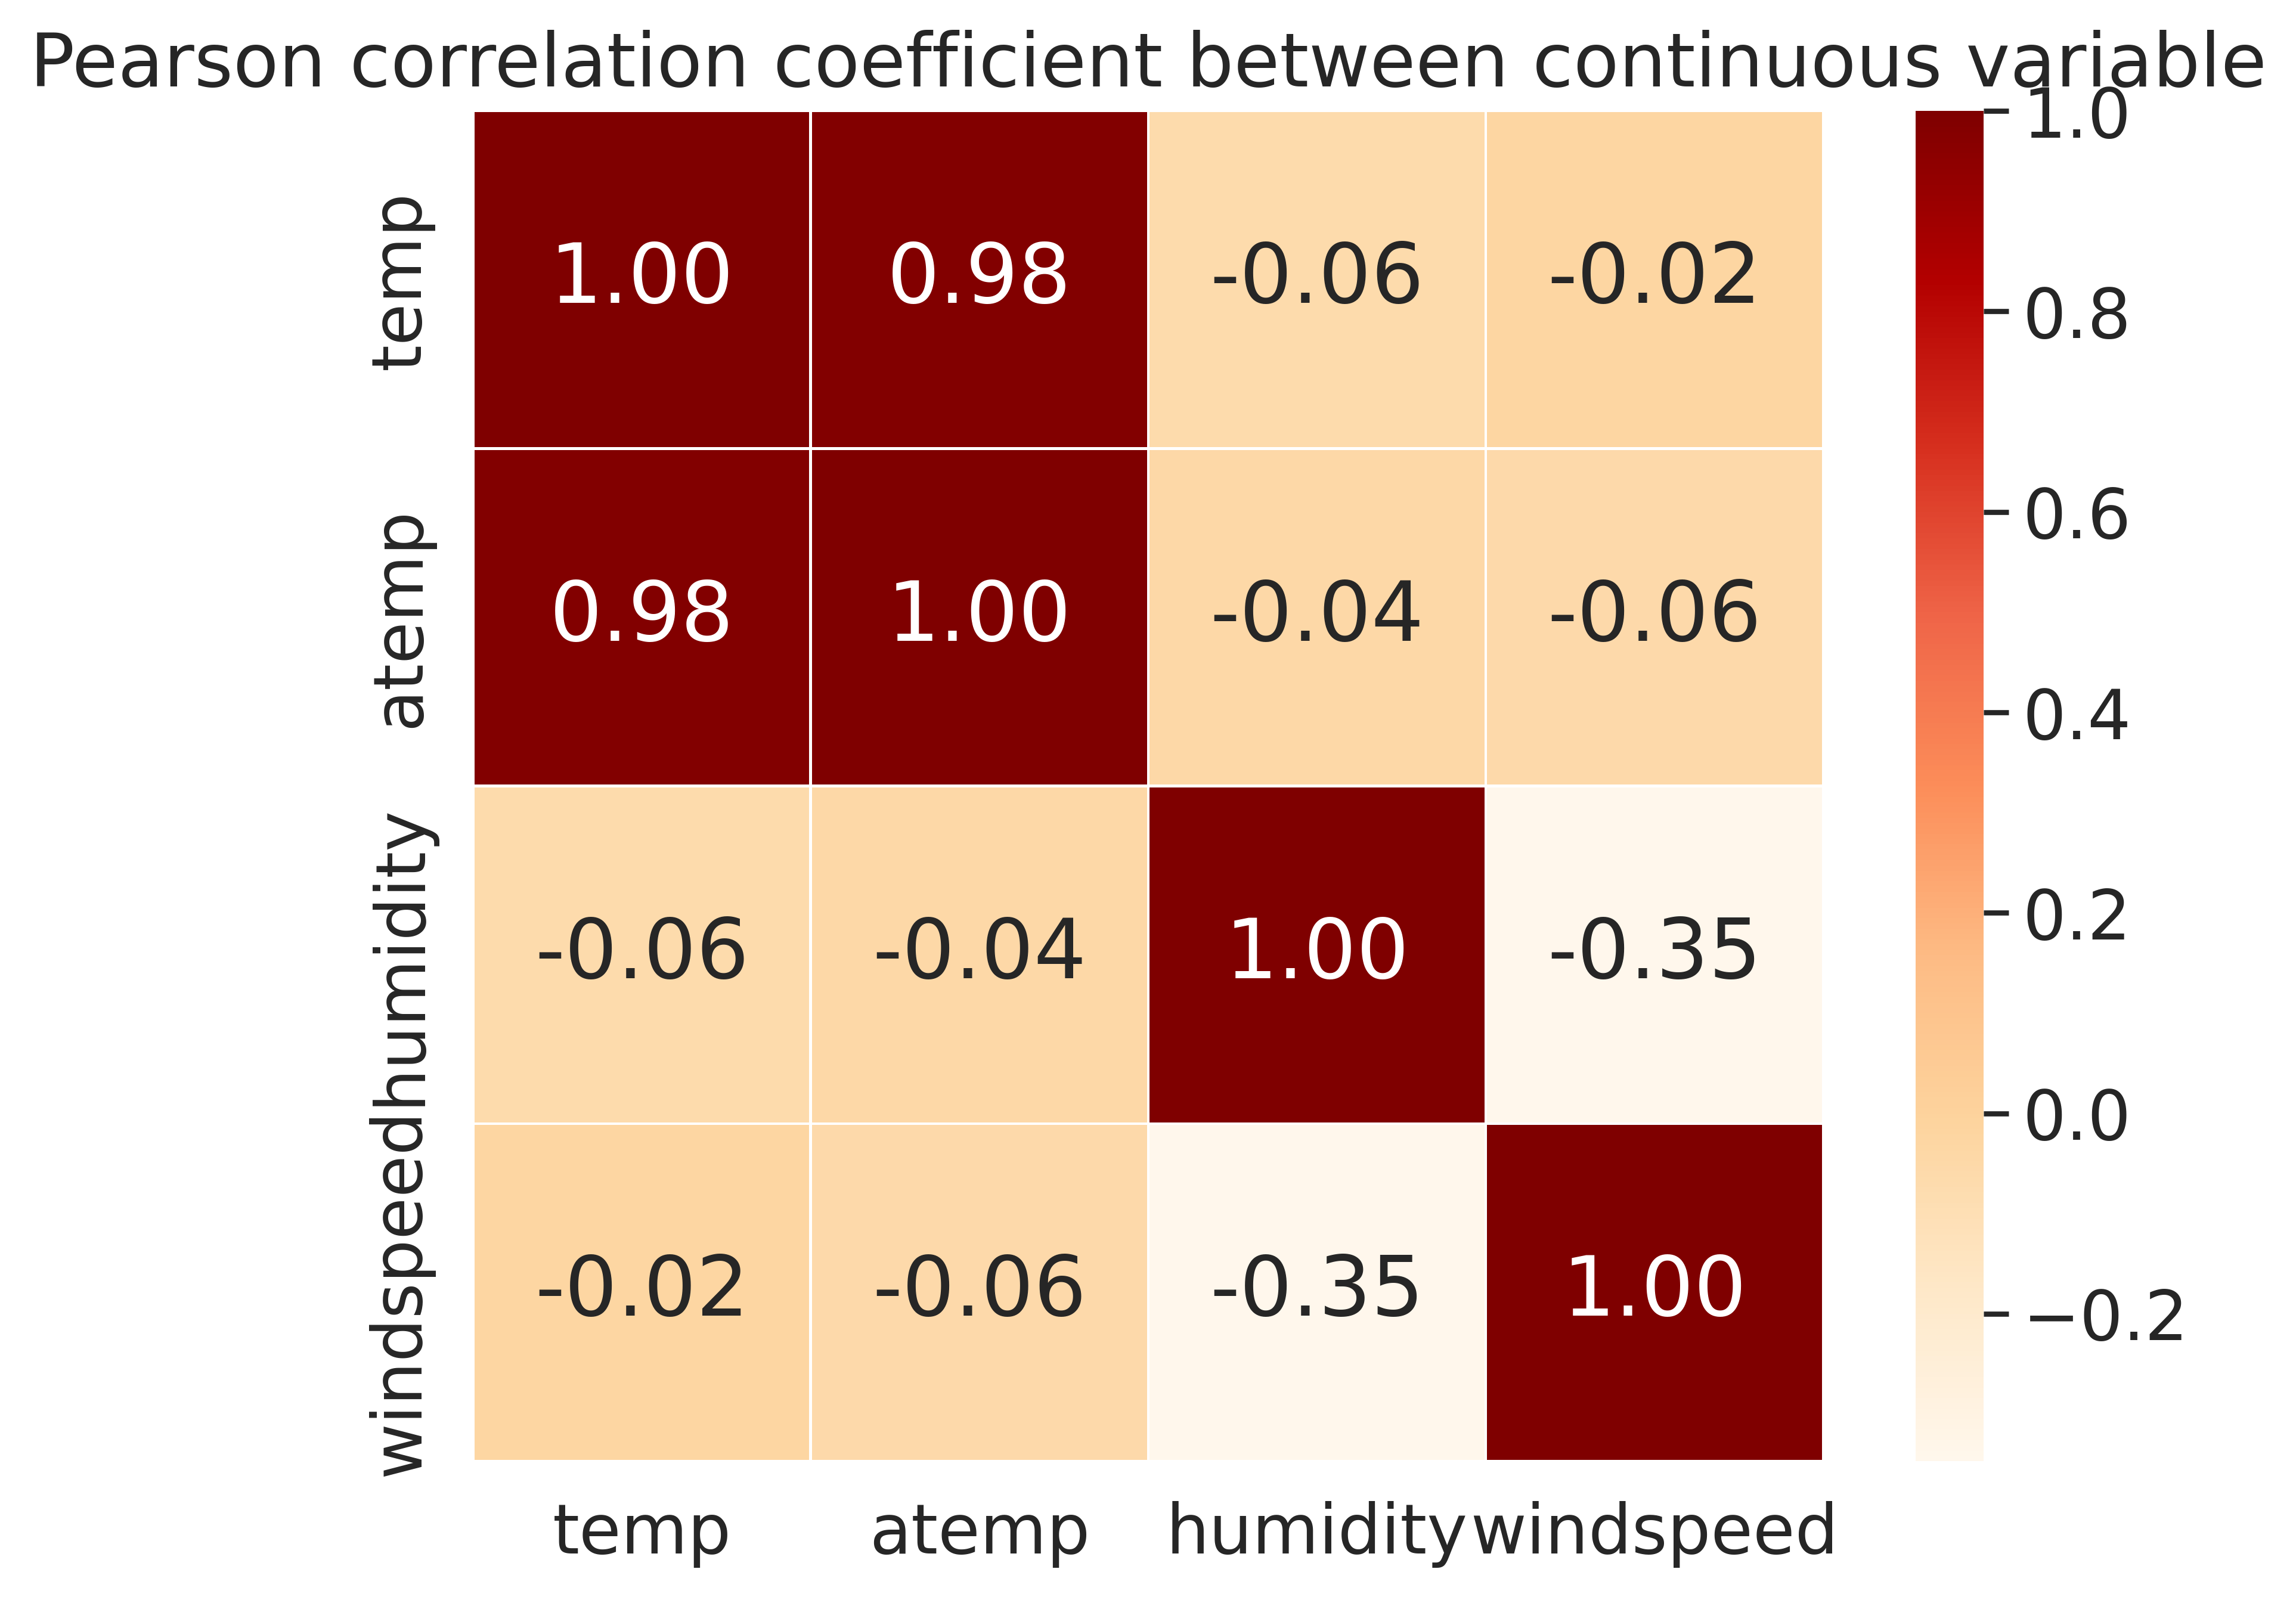

In [23]:
# Pearson correlation coefficient
sns.set(font_scale=1.5)
cols = ['temp', 'atemp', 'humidity', 'windspeed']
pccm = np.corrcoef(df[cols].values.T)

fig = plt.figure(figsize=(8, 6), dpi=500)
ax = fig.add_subplot(1, 1, 1)
ax.set(title="Pearson correlation coefficient between continuous variable")
hm = sns.heatmap(pccm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, cmap="OrRd", linewidth=.5, yticklabels=cols, xticklabels=cols)
plt.xticks(rotation=0)
# plt.show()

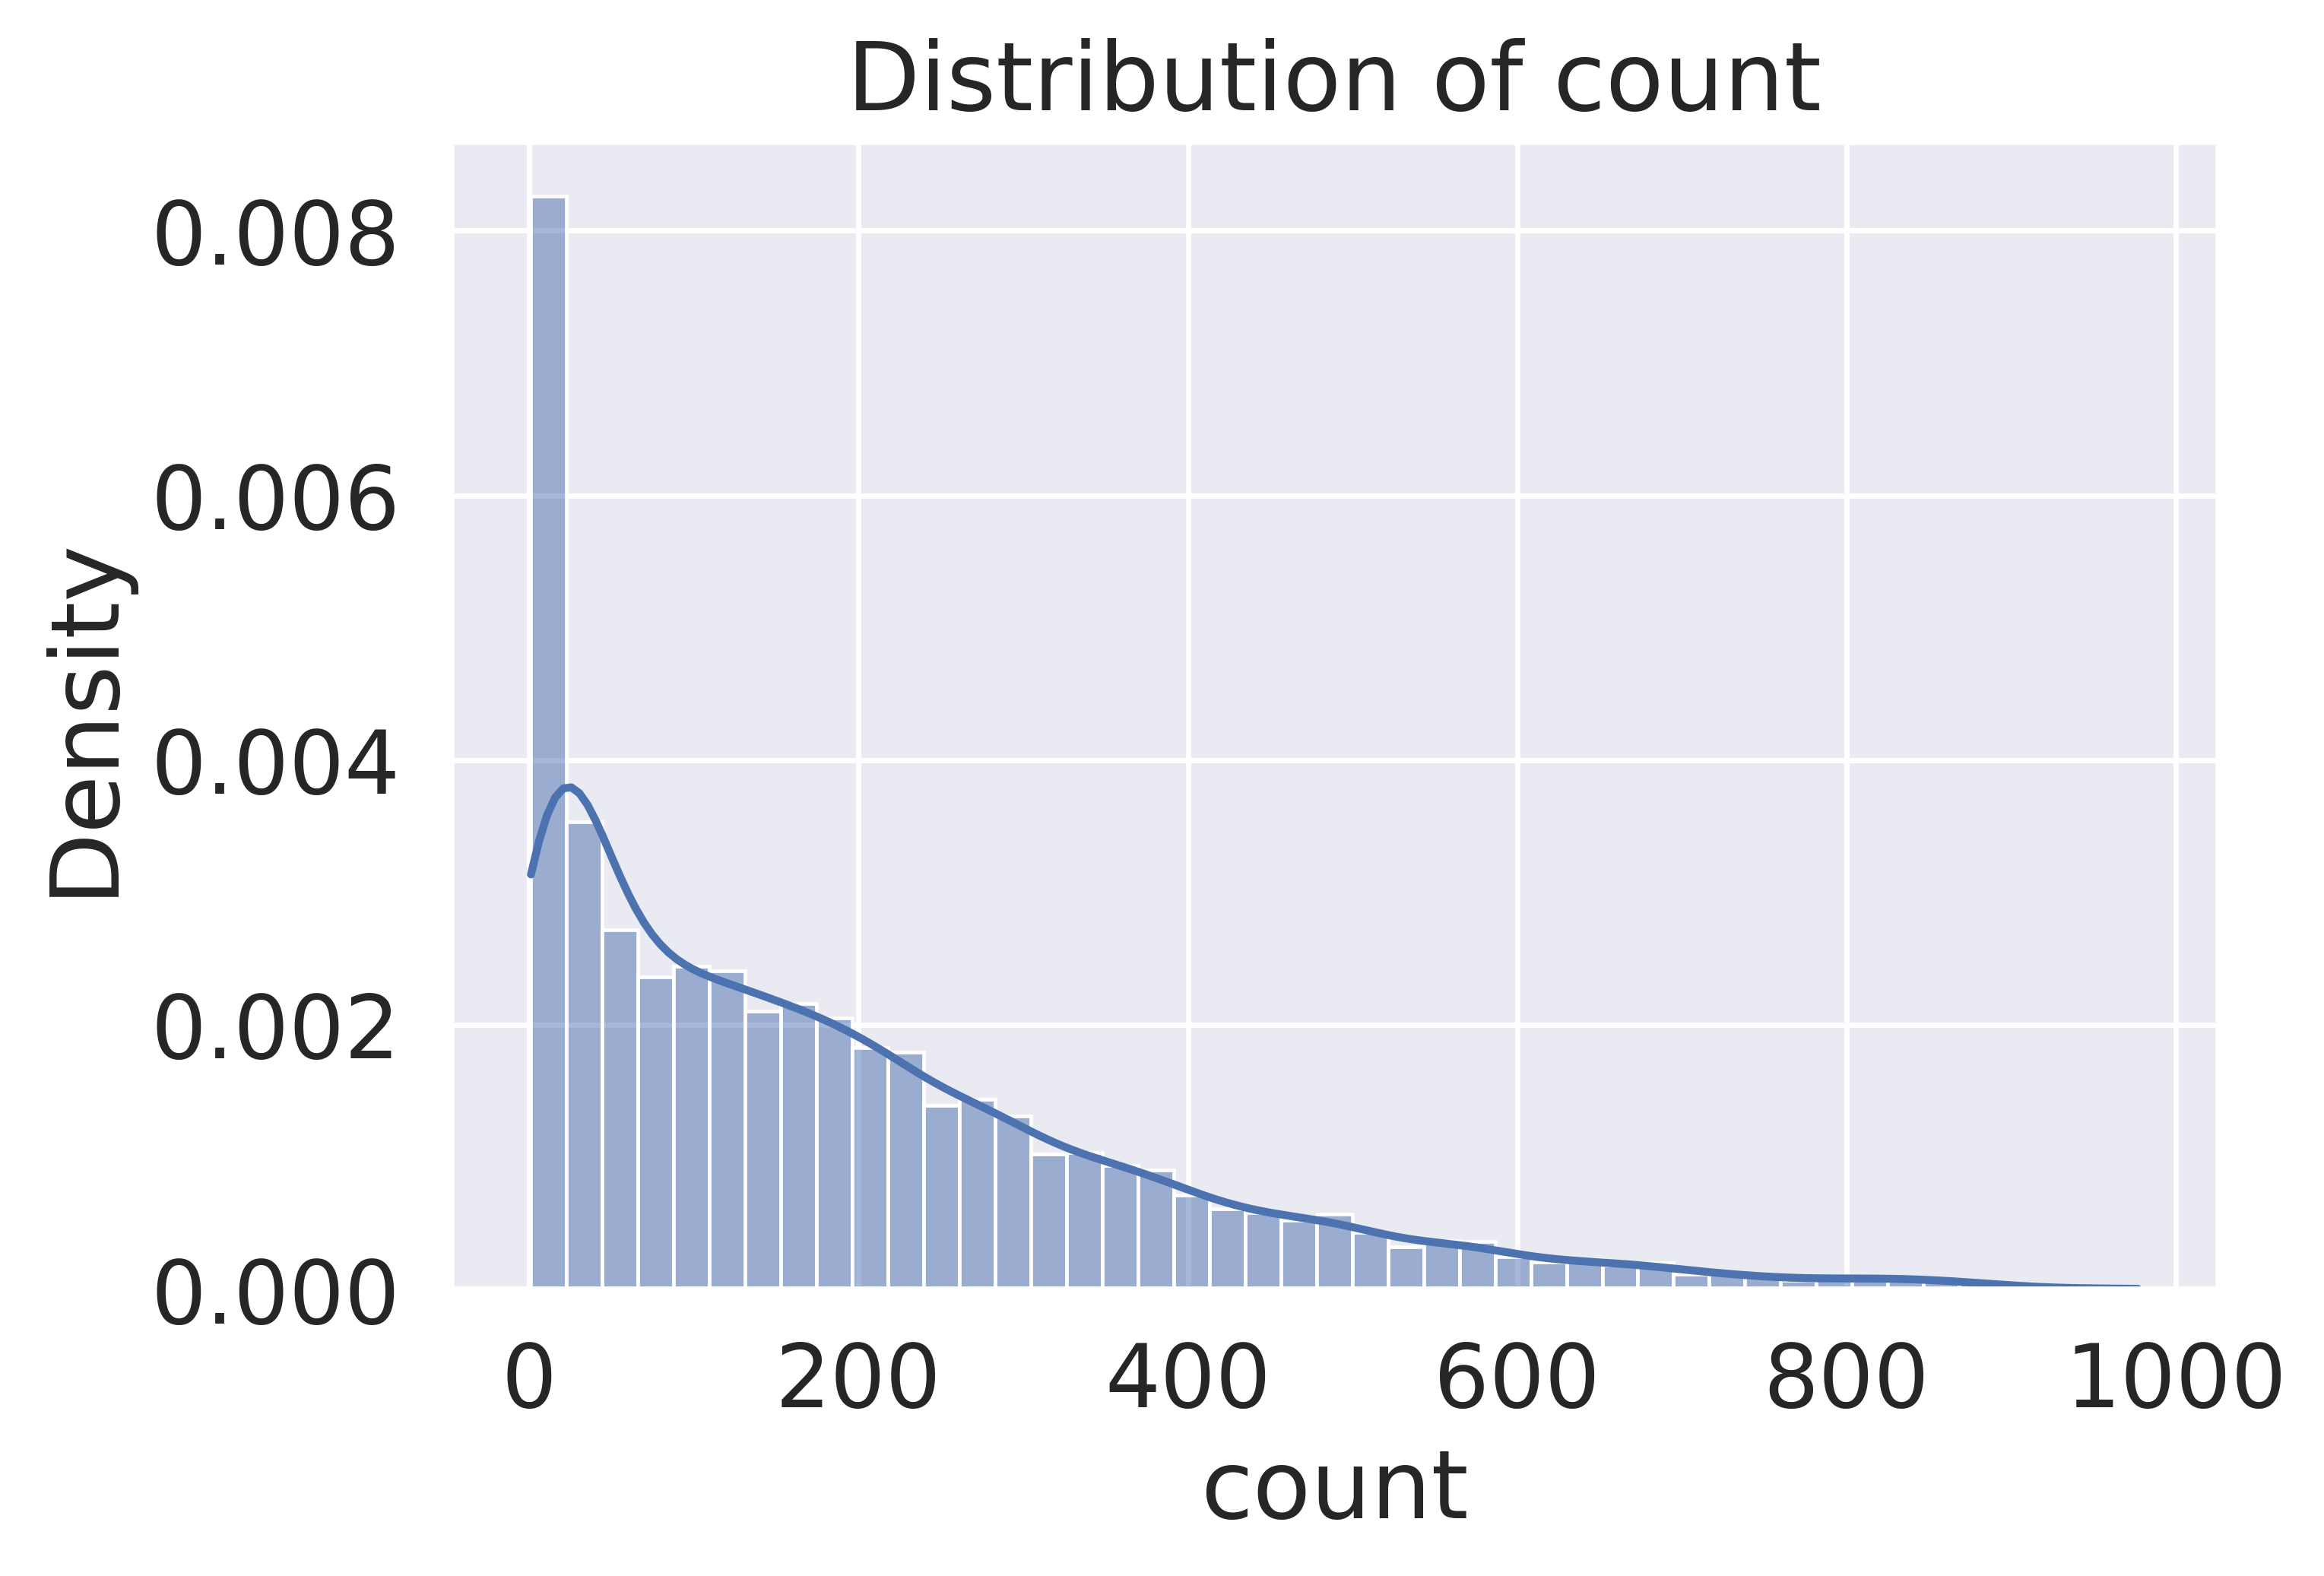

In [24]:
# distribution of count
fig = plt.figure(dpi=500)
ax = fig.add_subplot(1, 1, 1)
ax.set(xlabel='count', title='Distribution of count')
sns.histplot(df['count'], stat='density', kde=True)
# plt.show()

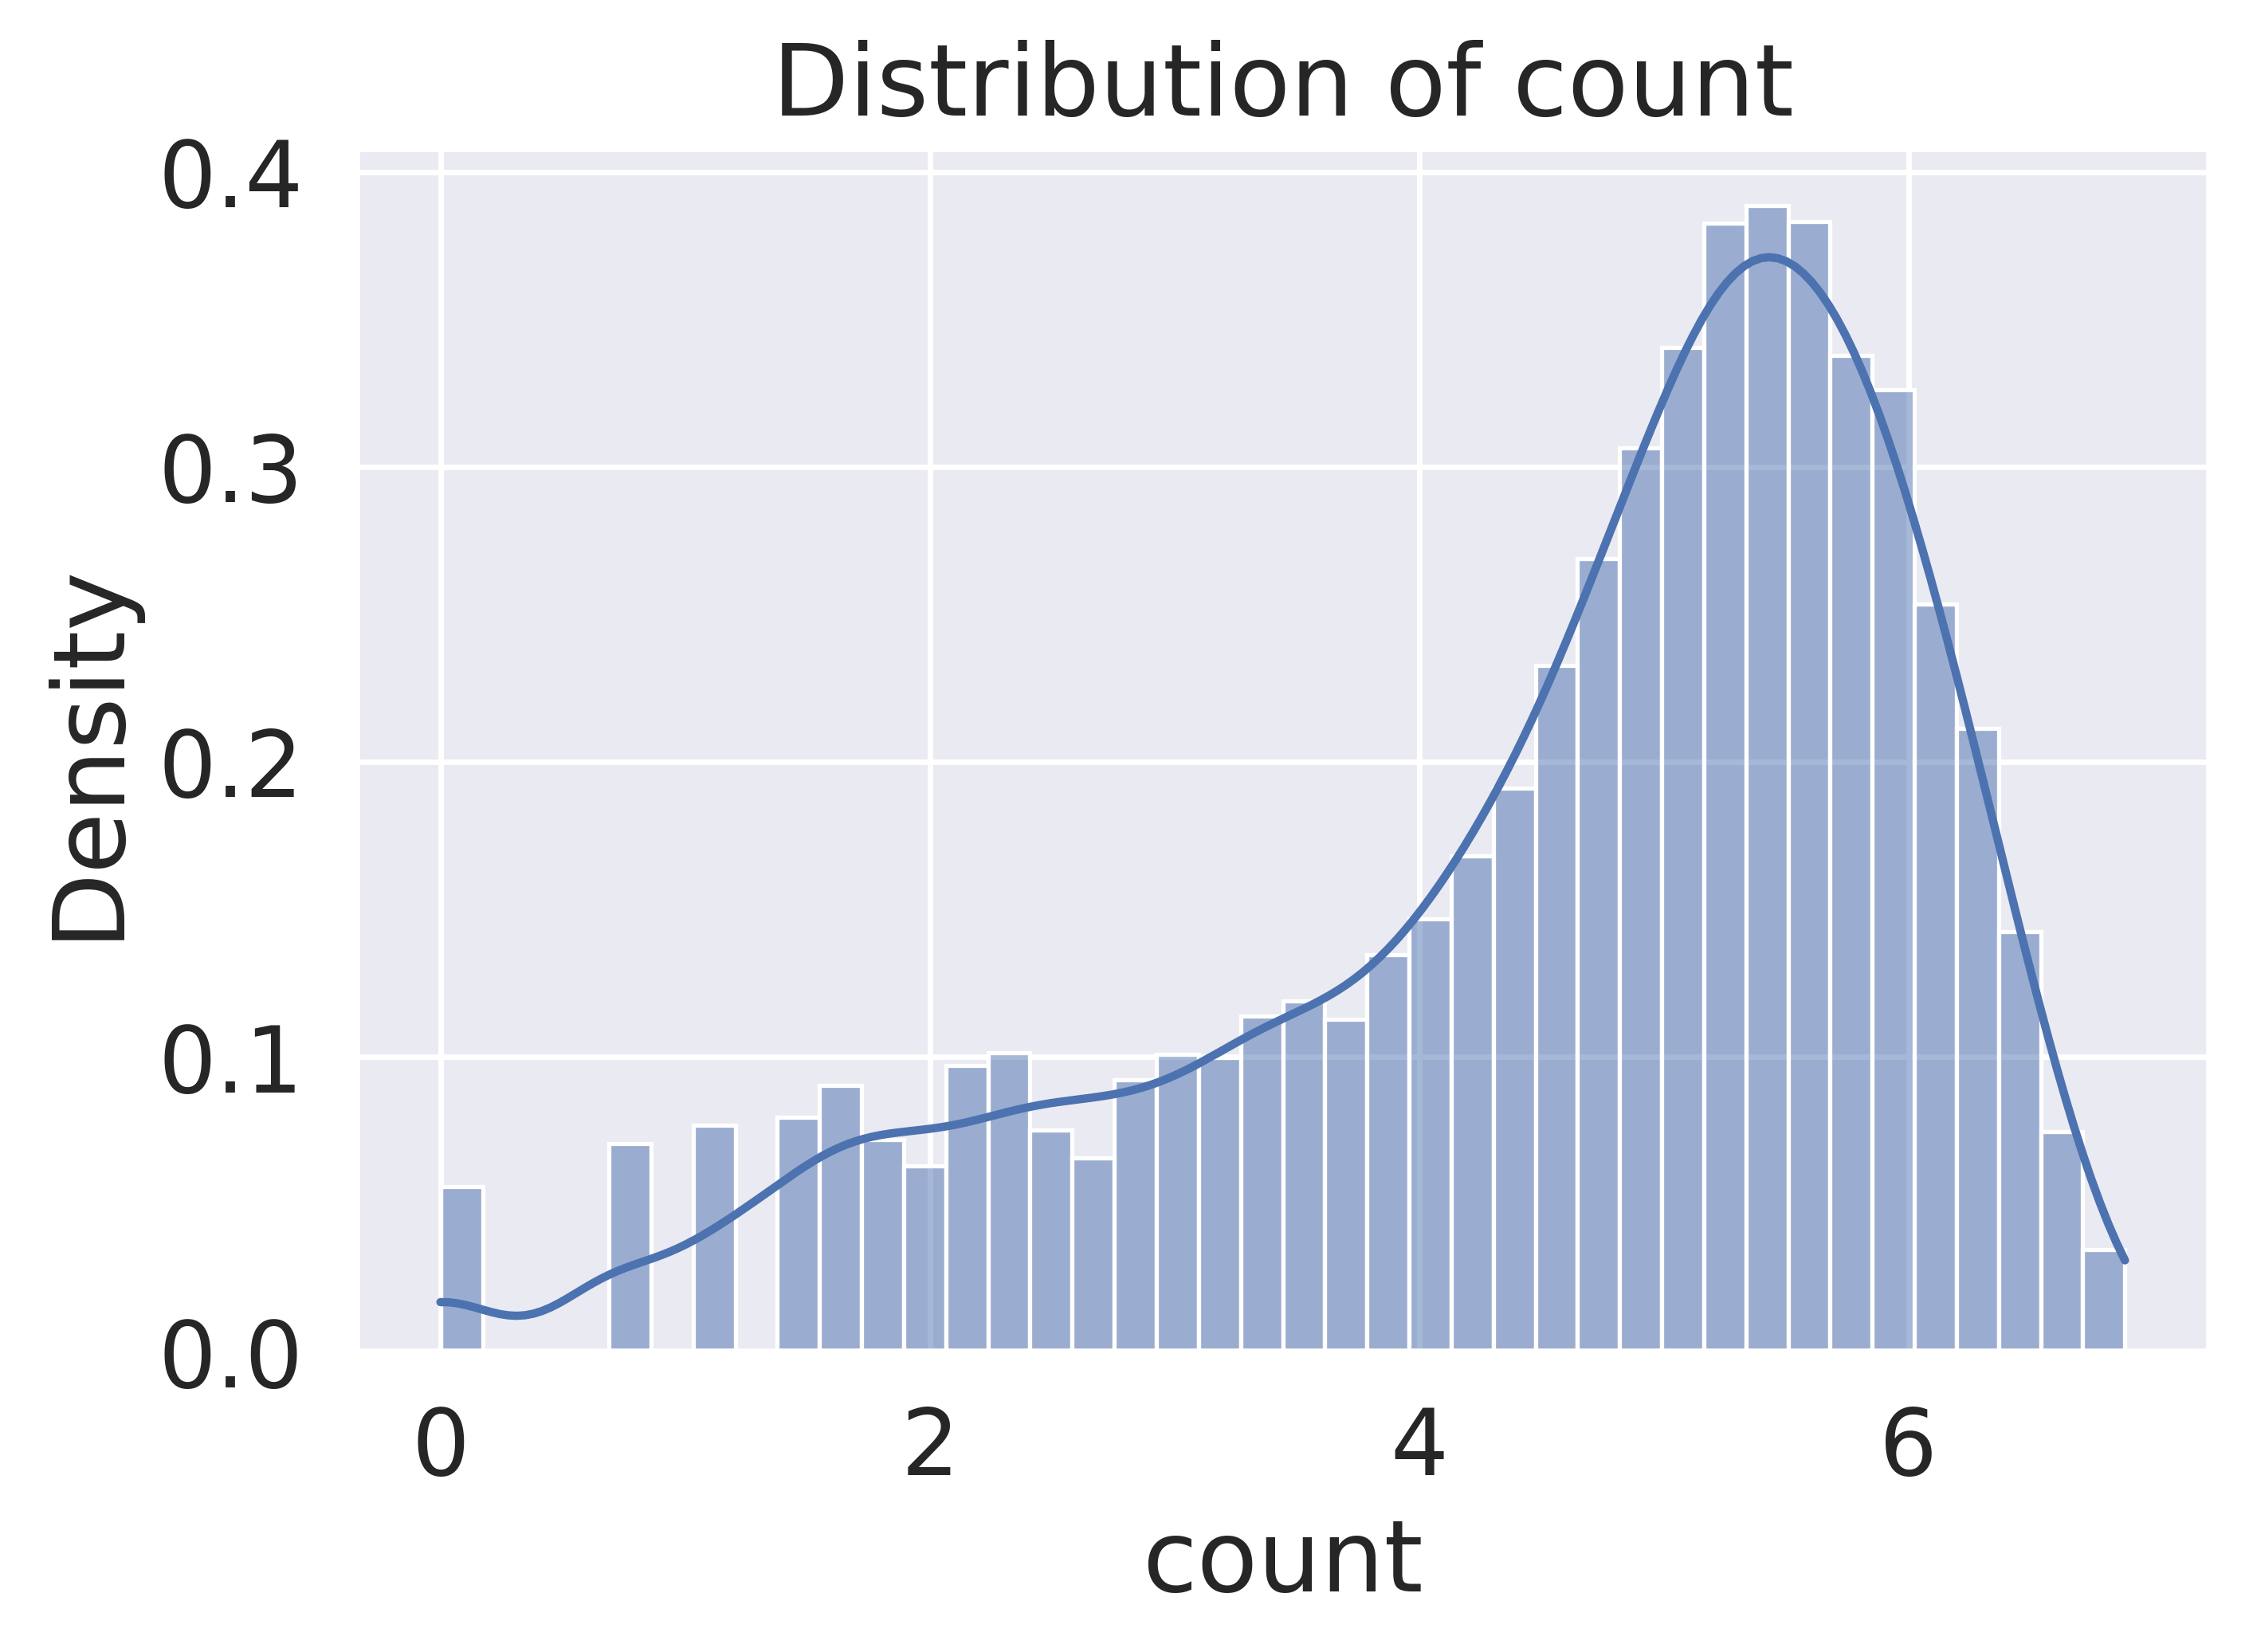

In [25]:
ylabels = df['count'].values
ylabels_log = np.log(df['count'])
# ylabels_np.reciprocal(df['count'])

# distribution of count
fig = plt.figure(dpi=500)
ax = fig.add_subplot(1, 1, 1)
ax.set(xlabel='count', title='Distribution of count')
sns.histplot(ylabels_log, stat='density', kde=True)
# plt.show()

# 開始建模

In [26]:
drop_cols = ['datetime', 'date', 'day', 'atemp', 'casual', 'registered', 'count']
df['log_count'] = np.log(df['count'])
train_set_df = df.drop(drop_cols , axis=1)
# print(train_set_df)  # show training data before training step.

whole_frame = h2o.H2OFrame(train_set_df)  # whole_frame = train_frame + valid_frame
features = whole_frame.col_names
features.remove('log_count')
print(features)
whole_frame
train_frame, valid_frame = whole_frame.split_frame(ratios=[.8], seed=10)
train_frame
valid_frame

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['year', 'month', 'weekday', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed']


year month weekday hour season holiday workingday weather temp humidity windspeed log_count 
 
 
 2011 1 5 5 1 0 0 2 9.84 75 6.0032 0 
 2011 1 5 20 1 0 0 2 16.4 87 16.9979 3.58352 
 2011 1 6 14 1 0 0 3 14.76 76 12.998 4.07754 
 2011 1 6 16 1 0 0 3 13.94 71 11.0014 4.33073 
 2011 1 0 6 1 0 1 1 5.74 50 26.0027 3.4012 
 2011 1 0 10 1 0 1 1 7.38 43 16.9979 3.78419 
 2011 1 0 18 1 0 1 1 9.84 32 7.0015 5.05625 
 2011 1 0 20 1 0 1 1 8.2 47 7.0015 3.95124 
 2011 1 1 5 1 0 1 1 4.92 68 7.0015 1.38629 
 2011 1 1 6 1 0 1 1 4.92 74 7.0015 3.58352

In [27]:
# grid search prepare for training model
gs_xgb = H2OXGBoostEstimator(
    booster='gbtree',
    max_depth=6,
    distribution='gaussian',
    categorical_encoding='auto',
    col_sample_rate=0.8,
    sample_rate=0.9,
    score_tree_interval=50,
    col_sample_rate_per_tree=0.9,
    seed=2021
) 

hyper_params = {
    'ntrees': [2500, 3000],
    'min_rows': [1, 5],
    'gamma': [0.001, 0.003],
    'learn_rate': [0.0075, 0.01]
}

grid = H2OGridSearch(gs_xgb, hyper_params, grid_id='tune_', search_criteria={'strategy': 'Cartesian'})
grid.train(x=features, y='log_count', training_frame=train_frame, validation_frame=valid_frame)

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%
      gamma  learn_rate  min_rows  ntrees       model_ids  residual_deviance
0     0.003      0.0075       5.0  3000.0  tune__model_14           0.092451
1     0.003      0.0100       1.0  3000.0  tune__model_12           0.092460
2     0.001      0.0075       5.0  3000.0  tune__model_13           0.092522
3     0.003      0.0100       5.0  3000.0  tune__model_16           0.092577
4     0.003      0.0100       1.0  2500.0   tune__model_4           0.092602
5     0.001      0.0100       5.0  3000.0  tune__model_15           0.092637
6     0.001      0.0100       1.0  3000.0  tune__model_11           0.092664
7     0.003      0.0100       5.0  2500.0   tune__model_8           0.092769
8     0.001      0.0100       1.0  2500.0   tune__model_3           0.092810
9     0.001      0.0100       5.0  2500.0   tune__model_7           0.092846
10    0.003      0.0075       1.0  3000.0  tune__model_10 

In [28]:
grid_results = grid.get_grid(sort_by='RMSE', decreasing=False)
print(grid_results)

      gamma  learn_rate  min_rows  ntrees       model_ids      rmse
0     0.003      0.0075       5.0  3000.0  tune__model_14  0.304058
1     0.003      0.0100       1.0  3000.0  tune__model_12  0.304072
2     0.001      0.0075       5.0  3000.0  tune__model_13  0.304175
3     0.003      0.0100       5.0  3000.0  tune__model_16  0.304265
4     0.003      0.0100       1.0  2500.0   tune__model_4  0.304306
5     0.001      0.0100       5.0  3000.0  tune__model_15  0.304363
6     0.001      0.0100       1.0  3000.0  tune__model_11  0.304407
7     0.003      0.0100       5.0  2500.0   tune__model_8  0.304579
8     0.001      0.0100       1.0  2500.0   tune__model_3  0.304647
9     0.001      0.0100       5.0  2500.0   tune__model_7  0.304706
10    0.003      0.0075       1.0  3000.0  tune__model_10  0.304743
11    0.003      0.0075       5.0  2500.0   tune__model_6  0.305048
12    0.001      0.0075       5.0  2500.0   tune__model_5  0.305157
13    0.001      0.0075       1.0  3000.0   tune

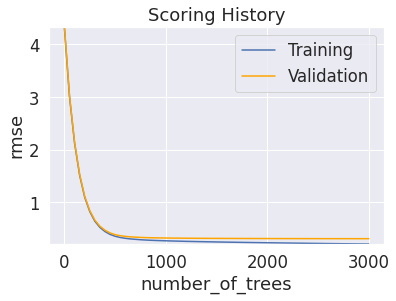

In [29]:
best_xgb = grid_results.models[0]
best_xgb.plot(metric='AUTO')

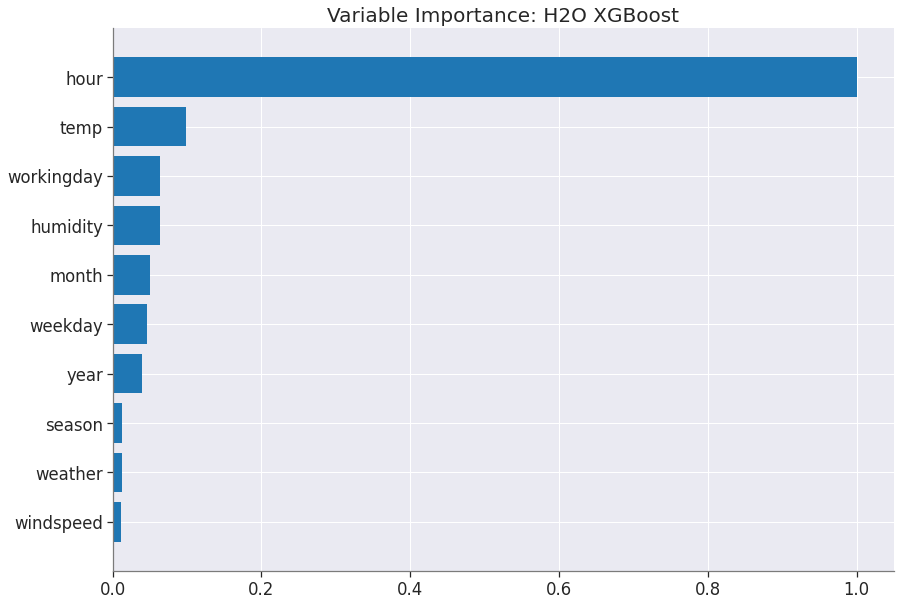

<Figure size 432x288 with 0 Axes>

In [30]:
best_xgb.varimp_plot()

In [31]:
best_xgb.score_history()

timestamp           duration  number_of_trees  training_rmse  \
0      2022-04-13 02:10:55  15 min 15.228 sec              0.0       4.312494   
1      2022-04-13 02:10:56  15 min 15.523 sec             50.0       3.006931   
2      2022-04-13 02:10:56  15 min 15.719 sec            100.0       2.123429   
3      2022-04-13 02:10:56  15 min 15.955 sec            150.0       1.510172   
4      2022-04-13 02:10:56  15 min 16.245 sec            200.0       1.092278   
.. ..                  ...                ...              ...            ...   
56     2022-04-13 02:12:08  16 min 28.282 sec           2800.0       0.206666   
57     2022-04-13 02:12:11  16 min 30.843 sec           2850.0       0.205478   
58     2022-04-13 02:12:13  16 min 33.429 sec           2900.0       0.204472   
59     2022-04-13 02:12:16  16 min 36.084 sec           2950.0       0.203367   
60     2022-04-13 02:12:19  16 min 38.706 sec           3000.0       0.202374   

    training_mae  training_deviance  validation_rmse  validation_mae  \
0       4.056779          18.597606         4.337564        4.084348   
1       2.804456           9.041637         3.027966        2.828148   
2       1.955924           4.508950         2.142866        1.978312   
3       1.374620           2.280619         1.528167        1.394579   
4       0.980021           1.193070         1.109421        0.996967   
..           ...                ...              ...             ...   
56      0.139249           0.042711         0.304441        0.200312   
57      0.138523           0.042221         0.304281        0.200154   
58      0.137861           0.041809         0.304213        0.200050   
59      0.137183           0.041358         0.304114        0.199916   
60      0.136541           0.040955         0.304058        0.199811   

    validation_deviance  
0             18.814466  
1              9.168579  
2              4.591874  
3              2.335295  
4              1.230814  
..                  ...  
56             0.092684  
57             0.092587  
58             0.092546  
59             0.092486  
60             0.092451  

[61 rows x 10 columns]

# train/test xgb with hyper-parameters which we got  after grid search

In [32]:
xgb_params = {'ntrees': 2000, 'booster': 'gbtree', 'max_depth': 6, 'learn_rate': 0.01, 'distribution': 'gaussian',
        'categorical_encoding': 'auto', 'gamma': 0.003, 'col_sample_rate': 0.8,
        'sample_rate': 0.9, 'col_sample_rate_per_tree': 0.9, 'min_rows': 5, 'seed': 2021, 
        'score_tree_interval': 50}
xgb = H2OXGBoostEstimator(**xgb_params)
xgb.train(x=features, y='log_count', training_frame=whole_frame)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1649814616294_1


Model Summary: 


number_of_trees
0             2000.0



ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.04772075497717519
RMSE: 0.2184508067670504
MAE: 0.1464394019704826
RMSLE: 0.07858750669674505
Mean Residual Deviance: 0.04772075497717519

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-04-13 02:22:49   0.032 sec              0.0       4.317441   
1     2022-04-13 02:22:50   0.370 sec             50.0       2.671111   
2     2022-04-13 02:22:50   0.597 sec            100.0       1.691861   
3     2022-04-13 02:22:50   0.957 sec            150.0       1.097704   
4     2022-04-13 02:22:51   1.340 sec            200.0       0.745671   
5     2022-04-13 02:22:51   1.822 sec            250.0       0.551832   
6     2022-04-13 02:22:52   2.376 sec            300.0       0.438350   
7     2022-04-13 02:22:52   2.861 sec            350.0       0.375361   
8     2022-04-13 02:22:53   3.360 sec            400.0       0.338350   
9     2022-04-13 02:22:53   3.850 sec            450.0       0.315401   
10    2022-04-13 02:22:54   4.359 sec            500.0       0.300483   
11    2022-04-13 02:22:54   4.899 sec            550.0       0.290343   
12    2022-04-13 02:22:55   5.489 sec            600.0       0.283223   
13    2022-04-13 02:22:55   6.144 sec            650.0       0.277635   
14    2022-04-13 02:22:56   6.787 sec            700.0       0.273176   
15    2022-04-13 02:22:57   7.544 sec            750.0       0.269000   
16    2022-04-13 02:22:57   8.287 sec            800.0       0.265681   
17    2022-04-13 02:22:58   9.034 sec            850.0       0.262620   
18    2022-04-13 02:22:59   9.822 sec            900.0       0.259581   
19    2022-04-13 02:23:00  10.700 sec            950.0       0.256941   

    training_mae  training_deviance  
0       4.062207          18.640296  
1       2.484689           7.134833  
2       1.546244           2.862392  
3       0.983351           1.204954  
4       0.648217           0.556026  
5       0.460168           0.304519  
6       0.351547           0.192151  
7       0.290694           0.140896  
8       0.254454           0.114481  
9       0.231359           0.099478  
10      0.216078           0.090290  
11      0.205552           0.084299  
12      0.198280           0.080216  
13      0.192751           0.077081  
14      0.188346           0.074625  
15      0.184372           0.072361  
16      0.181386           0.070587  
17      0.178485           0.068969  
18      0.175851           0.067382  
19      0.173579           0.066019


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0         hour        754554.000000           1.000000    0.722688
1         temp         73438.992188           0.097328    0.070338
2   workingday         45314.886719           0.060055    0.043401
3     humidity         44792.546875           0.059363    0.042901
4        month         36695.812500           0.048632    0.035146
5      weekday         34392.121094           0.045579    0.032940
6         year         29243.376953           0.038756    0.028008
7       season          8975.769531           0.011895    0.008597
8      weather          8819.061523           0.011688    0.008447
9    windspeed          7008.328613           0.009288    0.006712
10     holiday           859.510559           0.001139    0.000823

In [33]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1649814616294_1


Model Summary: 


number_of_trees
0             2000.0



ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.04772075497717519
RMSE: 0.2184508067670504
MAE: 0.1464394019704826
RMSLE: 0.07858750669674505
Mean Residual Deviance: 0.04772075497717519

Scoring History: 


timestamp    duration  number_of_trees  training_rmse  \
0     2022-04-13 02:22:49   0.032 sec              0.0       4.317441   
1     2022-04-13 02:22:50   0.370 sec             50.0       2.671111   
2     2022-04-13 02:22:50   0.597 sec            100.0       1.691861   
3     2022-04-13 02:22:50   0.957 sec            150.0       1.097704   
4     2022-04-13 02:22:51   1.340 sec            200.0       0.745671   
5     2022-04-13 02:22:51   1.822 sec            250.0       0.551832   
6     2022-04-13 02:22:52   2.376 sec            300.0       0.438350   
7     2022-04-13 02:22:52   2.861 sec            350.0       0.375361   
8     2022-04-13 02:22:53   3.360 sec            400.0       0.338350   
9     2022-04-13 02:22:53   3.850 sec            450.0       0.315401   
10    2022-04-13 02:22:54   4.359 sec            500.0       0.300483   
11    2022-04-13 02:22:54   4.899 sec            550.0       0.290343   
12    2022-04-13 02:22:55   5.489 sec            600.0       0.283223   
13    2022-04-13 02:22:55   6.144 sec            650.0       0.277635   
14    2022-04-13 02:22:56   6.787 sec            700.0       0.273176   
15    2022-04-13 02:22:57   7.544 sec            750.0       0.269000   
16    2022-04-13 02:22:57   8.287 sec            800.0       0.265681   
17    2022-04-13 02:22:58   9.034 sec            850.0       0.262620   
18    2022-04-13 02:22:59   9.822 sec            900.0       0.259581   
19    2022-04-13 02:23:00  10.700 sec            950.0       0.256941   

    training_mae  training_deviance  
0       4.062207          18.640296  
1       2.484689           7.134833  
2       1.546244           2.862392  
3       0.983351           1.204954  
4       0.648217           0.556026  
5       0.460168           0.304519  
6       0.351547           0.192151  
7       0.290694           0.140896  
8       0.254454           0.114481  
9       0.231359           0.099478  
10      0.216078           0.090290  
11      0.205552           0.084299  
12      0.198280           0.080216  
13      0.192751           0.077081  
14      0.188346           0.074625  
15      0.184372           0.072361  
16      0.181386           0.070587  
17      0.178485           0.068969  
18      0.175851           0.067382  
19      0.173579           0.066019


See the whole table with table.as_data_frame()

Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0         hour        754554.000000           1.000000    0.722688
1         temp         73438.992188           0.097328    0.070338
2   workingday         45314.886719           0.060055    0.043401
3     humidity         44792.546875           0.059363    0.042901
4        month         36695.812500           0.048632    0.035146
5      weekday         34392.121094           0.045579    0.032940
6         year         29243.376953           0.038756    0.028008
7       season          8975.769531           0.011895    0.008597
8      weather          8819.061523           0.011688    0.008447
9    windspeed          7008.328613           0.009288    0.006712
10     holiday           859.510559           0.001139    0.000823

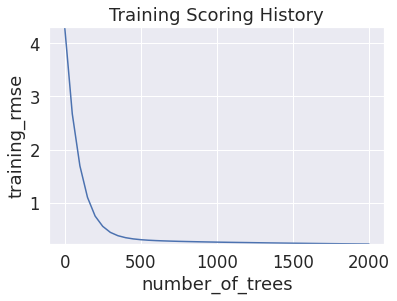

In [34]:
xgb.plot(metric='AUTO')

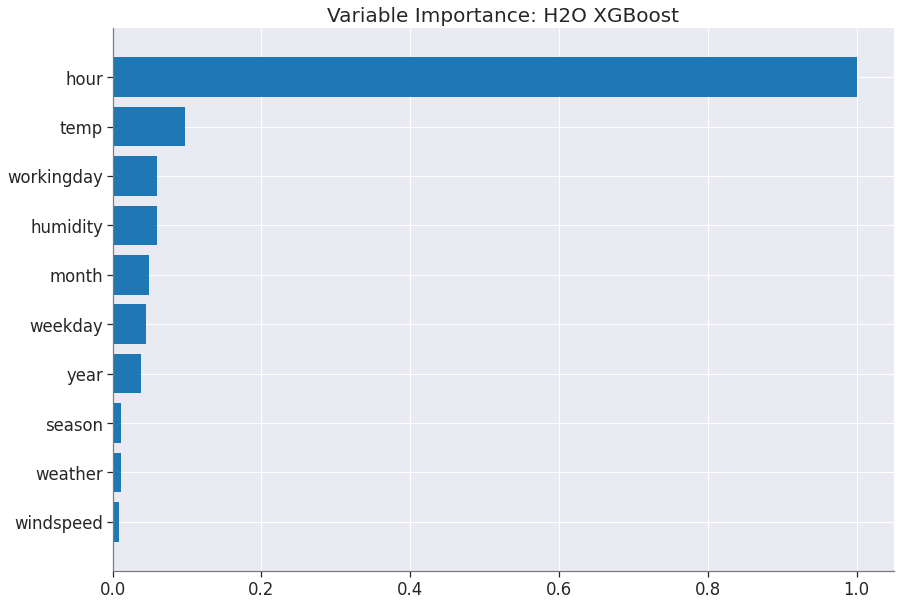

<Figure size 432x288 with 0 Axes>

In [35]:
xgb.varimp_plot()

In [36]:
xgb.score_history()

timestamp    duration  number_of_trees  training_rmse  \
0     2022-04-13 02:22:49   0.032 sec              0.0       4.317441   
1     2022-04-13 02:22:50   0.370 sec             50.0       2.671111   
2     2022-04-13 02:22:50   0.597 sec            100.0       1.691861   
3     2022-04-13 02:22:50   0.957 sec            150.0       1.097704   
4     2022-04-13 02:22:51   1.340 sec            200.0       0.745671   
5     2022-04-13 02:22:51   1.822 sec            250.0       0.551832   
6     2022-04-13 02:22:52   2.376 sec            300.0       0.438350   
7     2022-04-13 02:22:52   2.861 sec            350.0       0.375361   
8     2022-04-13 02:22:53   3.360 sec            400.0       0.338350   
9     2022-04-13 02:22:53   3.850 sec            450.0       0.315401   
10    2022-04-13 02:22:54   4.359 sec            500.0       0.300483   
11    2022-04-13 02:22:54   4.899 sec            550.0       0.290343   
12    2022-04-13 02:22:55   5.489 sec            600.0       0.283223   
13    2022-04-13 02:22:55   6.144 sec            650.0       0.277635   
14    2022-04-13 02:22:56   6.787 sec            700.0       0.273176   
15    2022-04-13 02:22:57   7.544 sec            750.0       0.269000   
16    2022-04-13 02:22:57   8.287 sec            800.0       0.265681   
17    2022-04-13 02:22:58   9.034 sec            850.0       0.262620   
18    2022-04-13 02:22:59   9.822 sec            900.0       0.259581   
19    2022-04-13 02:23:00  10.700 sec            950.0       0.256941   
20    2022-04-13 02:23:01  11.586 sec           1000.0       0.254343   
21    2022-04-13 02:23:02  12.507 sec           1050.0       0.251987   
22    2022-04-13 02:23:03  13.471 sec           1100.0       0.249802   
23    2022-04-13 02:23:04  14.474 sec           1150.0       0.247770   
24    2022-04-13 02:23:05  15.589 sec           1200.0       0.245807   
25    2022-04-13 02:23:06  16.671 sec           1250.0       0.243598   
26    2022-04-13 02:23:07  17.841 sec           1300.0       0.241450   
27    2022-04-13 02:23:08  18.968 sec           1350.0       0.239383   
28    2022-04-13 02:23:09  20.139 sec           1400.0       0.237483   
29    2022-04-13 02:23:11  21.346 sec           1450.0       0.235692   
30    2022-04-13 02:23:12  22.613 sec           1500.0       0.233967   
31    2022-04-13 02:23:13  23.908 sec           1550.0       0.232318   
32    2022-04-13 02:23:15  25.460 sec           1600.0       0.230573   
33    2022-04-13 02:23:16  27.013 sec           1650.0       0.228999   
34    2022-04-13 02:23:18  28.416 sec           1700.0       0.227394   
35    2022-04-13 02:23:19  29.841 sec           1750.0       0.225832   
36    2022-04-13 02:23:21  31.322 sec           1800.0       0.224284   
37    2022-04-13 02:23:22  32.933 sec           1850.0       0.222717   
38    2022-04-13 02:23:24  34.508 sec           1900.0       0.221206   
39    2022-04-13 02:23:25  36.100 sec           1950.0       0.219788   
40    2022-04-13 02:23:27  37.843 sec           2000.0       0.218451   

    training_mae  training_deviance  
0       4.062207          18.640296  
1       2.484689           7.134833  
2       1.546244           2.862392  
3       0.983351           1.204954  
4       0.648217           0.556026  
5       0.460168           0.304519  
6       0.351547           0.192151  
7       0.290694           0.140896  
8       0.254454           0.114481  
9       0.231359           0.099478  
10      0.216078           0.090290  
11      0.205552           0.084299  
12      0.198280           0.080216  
13      0.192751           0.077081  
14      0.188346           0.074625  
15      0.184372           0.072361  
16      0.181386           0.070587  
17      0.178485           0.068969  
18      0.175851           0.067382  
19      0.173579           0.066019  
20      0.171515           0.064690  
21      0.169660           0.063497  
22      0.167978           0.062401  
23      0.166406           0.061390  

In [37]:
test_df = pd.read_csv('/content/test.csv')
test_df.insert(1, 'date', test_df.datetime.apply(lambda x: x.split()[0]))
test_df.insert(2, 'year', test_df.datetime.apply(lambda x: x.split()[0].split('-')[0]).astype('int'))
test_df.insert(3, 'month', test_df.datetime.apply(lambda x: x.split()[0].split('-')[1]).astype('int'))
test_df.insert(4, 'weekday', test_df.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday()))
test_df.insert(5, 'hour', test_df.datetime.apply(lambda x : x.split()[1].split(':')[0]).astype('int'))

datetime_col = test_df['datetime']
drop_cols = ['datetime', 'date', 'atemp']
test_df = test_df.drop(drop_cols, axis=1)
# print(test_df)  #  show testing data before testing step.
test_frame = h2o.H2OFrame(test_df)
test_frame

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


year month weekday hour season holiday workingday weather temp humidity windspeed 
 
 
 2011 1 3 0 1 0 1 1 10.66 56 26.0027 
 2011 1 3 1 1 0 1 1 10.66 56 0 
 2011 1 3 2 1 0 1 1 10.66 56 0 
 2011 1 3 3 1 0 1 1 10.66 56 11.0014 
 2011 1 3 4 1 0 1 1 10.66 56 11.0014 
 2011 1 3 5 1 0 1 1 9.84 60 15.0013 
 2011 1 3 6 1 0 1 1 9.02 60 15.0013 
 2011 1 3 7 1 0 1 1 9.02 55 15.0013 
 2011 1 3 8 1 0 1 1 9.02 55 19.0012 
 2011 1 3 9 1 0 1 2 9.84 52 15.0013

In [38]:
prediction = xgb.predict(test_frame).as_data_frame().values.ravel()
# prediction
submission = pd.DataFrame({'datetime': datetime_col , 'count': [max(0, round(pred)) for pred in np.exp(prediction)]})
submission.to_csv('./bike_predictions.csv', index=False)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


# 最終performance 來到0.41 約是PR90 350/3242

In [ ]:
# # 原先採用sklearn.ensemble RandomForestRegressor 建模，但改用XBG表現較好。
# # onehot_weekday = pd.get_dummies(df['weekday'], prefix='weekday')
# # onehot_season = pd.get_dummies(df['season'], prefix='season')
# # onehot_holiday = pd.get_dummies(df['holiday'], prefix='holiday')
# # onehot_workingday = pd.get_dummies(df['workingday'], prefix='workingday')
# # onehot_weather = pd.get_dummies(df['weather'], prefix='weather')
# # df = pd.concat([df, onehot_season, onehot_holiday, onehot_workingday, onehot_weather], axis=1)
# # drop_cols = ['datetime', 'date', 'year', 'month', 'day', 'weekday', 'season', 'holiday', 'workingday', 'weather', 'atemp', 'casual',
# #              'registered', 'count']

# drop_cols = ['datetime', 'date', 'day', 'atemp', 'casual', 'registered', 'count']
# y_labels_log = np.log(df['count'])
# train_df = df.drop(drop_cols , axis=1)
# # print(train_df)  # show training data before training step.
# rfr = RandomForestRegressor(n_estimators=1800, n_jobs=-1, verbose=1, random_state=123)
# rfr.fit(train_df , y_labels_log)

# sorted_idx = rfr.feature_importances_.argsort()
# plt.barh(train_df.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
# plt.title("RandomForest feature importance")
# # plt.show()

# test_df = pd.read_csv('/content/test.csv')
# test_df.insert(1, 'date', test_df.datetime.apply(lambda x: x.split()[0]))
# test_df.insert(2, 'year', test_df.datetime.apply(lambda x: x.split()[0].split('-')[0]).astype('int'))
# test_df.insert(3, 'month', test_df.datetime.apply(lambda x: x.split()[0].split('-')[1]).astype('int'))
# test_df.insert(4, 'weekday', test_df.date.apply(lambda x: datetime.strptime(x, "%Y-%m-%d").weekday()))
# test_df.insert(5, 'hour', test_df.datetime.apply(lambda x : x.split()[1].split(':')[0]).astype('int'))

# # onehot_weekday = pd.get_dummies(test_df['weekday'], prefix='weekday')
# # onehot_season = pd.get_dummies(test_df['season'], prefix='season')
# # onehot_holiday = pd.get_dummies(test_df['holiday'], prefix='holiday')
# # onehot_workingday = pd.get_dummies(test_df['workingday'], prefix='workingday')
# # onehot_weather = pd.get_dummies(test_df['weather'], prefix='weather')
# # test_df = pd.concat([test_df, onehot_weekday, onehot_season, onehot_holiday, onehot_workingday, onehot_weather], axis=1)
# # drop_cols = ['datetime', 'weekday', 'season', 'holiday', 'workingday', 'weather', 'atemp']


# datetime_col = test_df['datetime']
# drop_cols = ['datetime', 'date', 'atemp']
# test_df = test_df.drop(drop_cols , axis=1)
# # print(test_df)  #  show testing data before testing step.
# prediction = rfr.predict(test_df)
# submission = pd.DataFrame({'datetime': datetime_col , 'count': [max(0, round(pred)) for pred in np.exp(prediction)]})
# submission.to_csv('D:/Python_Project/dataset/bike_sharing_demand/bike_predictions.csv', index=False)